# Problem Statement

### Background  
X Education is an online education company that offers courses to industry professionals. The company markets its courses through various platforms, including websites, search engines like Google, and referrals. Professionals interested in the courses often visit the website, where they may browse offerings, fill out inquiry forms, or watch promotional videos. When a visitor provides their email address or phone number by filling out a form, they become classified as a **lead**. The sales team then engages with these leads through calls, emails, and other forms of communication to convert them into paying customers.  

Currently, X Education's **lead conversion rate** is only **30%**, meaning that out of every 100 leads acquired, only about 30 are successfully converted into customers. This low conversion rate results in a significant amount of time and resources being spent on leads with low potential, while promising leads might not receive adequate attention.  

### Business Problem  
To improve the efficiency of their sales process and maximize conversions, X Education aims to identify the most promising leads, referred to as **"Hot Leads"**. By targeting these high-potential leads, the company intends to prioritize their sales efforts and enhance their conversion rate to **80%**, a significant improvement over the current rate.  

The lead conversion process can be visualized as a funnel:  
1. A large number of leads are generated at the top (initial stage).  
2. Leads are nurtured and engaged during the middle stage (via communication and education).  
3. Only a small number convert into paying customers at the bottom.  

The company’s primary challenge is to focus on the middle stage by identifying and nurturing the most promising leads, thus reducing wasted effort on leads unlikely to convert.

### Objective  
The primary objective of this analysis is to develop a **predictive model** to assign a **Lead Score** (between 0 and 100) to each lead based on their likelihood of conversion. A higher score would indicate a lead is "hot" (high conversion potential), while a lower score would indicate a "cold" lead (low conversion potential).  

The deliverables for this project include:  
1. A **logistic regression model** to predict lead Conversion_Probability.  
2. **Insights and recommendations** to address additional business challenges, ensuring the model is flexible for future needs.  
3. Clear **visualizations** and evaluation metrics to explain model performance and results.  
4. A structured **presentation** summarizing findings in business terms, supported by data.  
5. A **summary report** (500 words) explaining the approach, analysis, and key takeaways.  

### Dataset Overview  
The dataset contains around **9,000 leads**, with various features such as:  
- `Lead Source`  
- `Total Time Spent on Website`  
- `Total Visits`  
- `Last Activity`  

The target variable is `Converted`, where:  
- `1` indicates the lead was converted.  
- `0` indicates the lead was not converted.  

Some features have levels such as 'Select,' which represent missing or null values and need to be handled appropriately during data preprocessing.  

### Expected Outcome  
By building the predictive model, X Education seeks to:  
1. Focus its sales efforts on high-potential leads, leading to more effective resource allocation.  
2. Increase the overall lead conversion rate to the target of **80%**.  
3. Gain actionable insights into the key factors influencing lead conversion.  

This solution will enable the company to streamline its lead nurturing process, ultimately increasing profitability and efficiency.

---

# 1. Setting up Notebook and Loading the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc

In [2]:
# Setting up notebook view options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
# Reading the dataset
df = pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0        0.000   
1  Organic Search           No          No          0        5.000   
2  Direct Traffic           No          No          1        2.000   
3  Direct Traffic           No          No          0        1.000   
4          Google           No          No          1        2.000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                 0.000  Page Visited on Website   
1                          674                 2.500             Email Opened   
2                         1532                 2.000             Email Opened   
3                          305                 1.000              Unreachable   
4                         1428                 1.000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# 2. DataSet Check

In [4]:
total_cols = df.shape[1]
print('Number of Columns: ', total_cols)
df.shape

Number of Columns:  37


(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count     9240.000   9240.000     9103.000                     9240.000   
mean    617188.436      0.385        3.445                      487.698   
std      23405.996      0.487        4.855                      548.021   
min     579533.000      0.000        0.000                        0.000   
25%     596484.500      0.000        1.000                       12.000   
50%     615479.000      0.000        3.000                      248.000   
75%     637387.250      1.000        5.000                      936.000   
max     660737.000      1.000      251.000                     2272.000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count              9103.000                     5022.000   
mean                  2.363                       14.306   
std                   2.161                        1.387   
min                   0.000                        7.000   
25%                   1.000                       14.000   
50%                   2.000                       14.000   
75%                   3.000                       15.000   
max                  55.000                       18.000   

       Asymmetrique Profile Score  
count                    5022.000  
mean                       16.345  
std                         1.811  
min                        11.000  
25%                        15.000  
50%                        16.000  
75%                        18.000  
max                        20.000

# 3. Data Preprocessing

## 3.1 `Select` - Replacing with 'Unknown'
- `Select` seems to be erroneously captured in the data collection process despite not being a valid data point.
- We can replace this with 'Unknown'

In [7]:
# Replacing 'Select' with NaN in the entire DataFrame
df = df.replace('Select', 'Unknown')

## 3.2 Null Check - Dropping High Null Columns

### 3.2.1 Visualizing Missing Info

<Axes: >

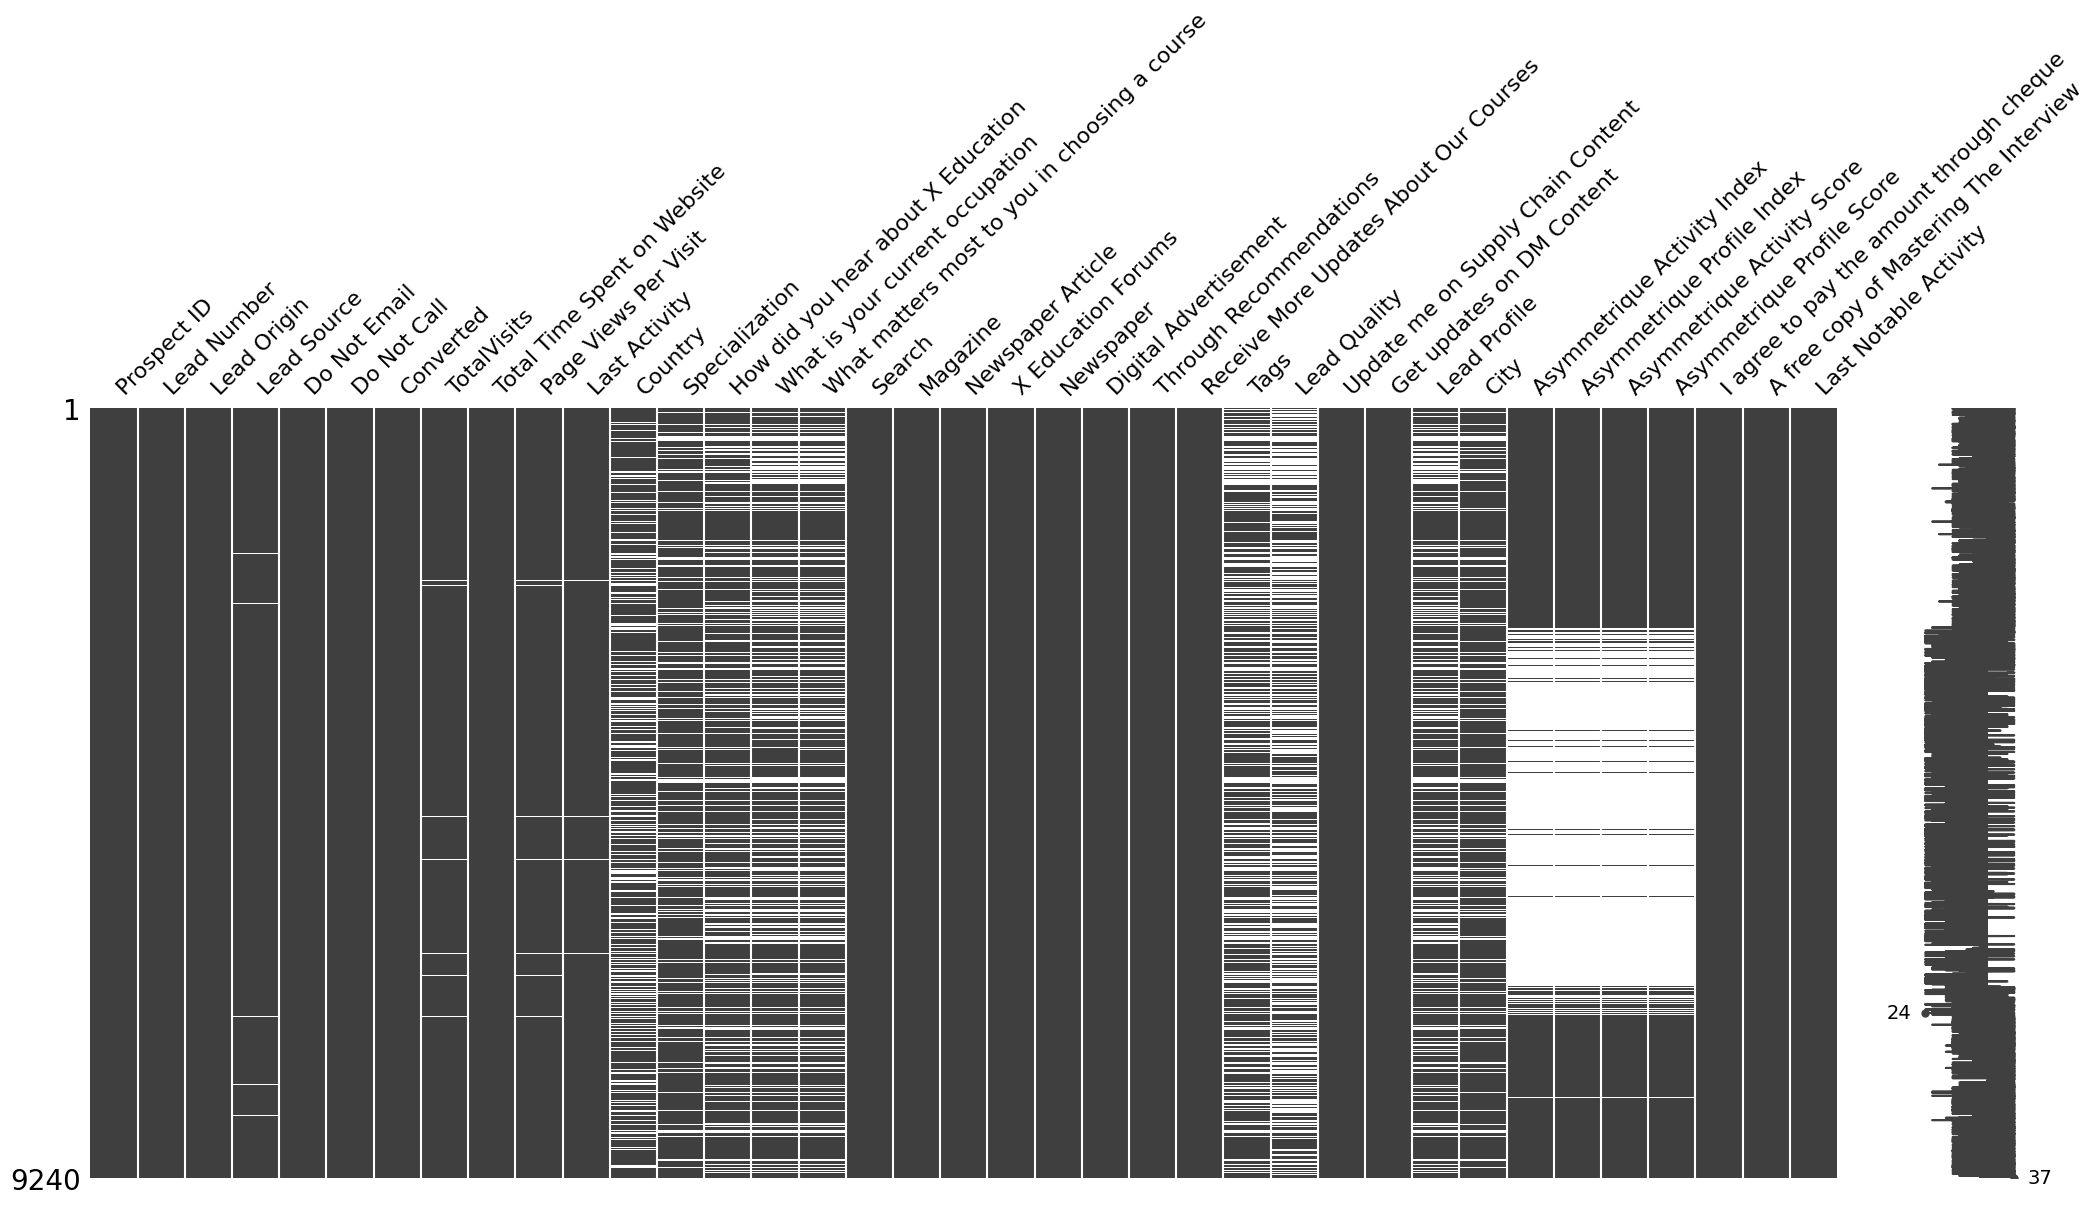

In [8]:
# Visualize missing values as a matrix
msno.matrix(df)

In [9]:
(df.isnull().mean()*100).sort_values(ascending=False)

Lead Quality                                    51.591
Asymmetrique Activity Index                     45.649
Asymmetrique Profile Score                      45.649
Asymmetrique Activity Score                     45.649
Asymmetrique Profile Index                      45.649
Tags                                            36.288
Lead Profile                                    29.318
What matters most to you in choosing a course   29.318
What is your current occupation                 29.113
Country                                         26.634
How did you hear about X Education              23.885
Specialization                                  15.563
City                                            15.368
Page Views Per Visit                             1.483
TotalVisits                                      1.483
Last Activity                                    1.115
Lead Source                                      0.390
Receive More Updates About Our Courses           0.000
I agree to

---
- Some columns have extremely high Null %.
- We will set a threshold of 30% Nulls as acceptable and try to impute, the columns with higher Null % will be dropped.

### 3.2.2 Drop Columns with Null % > 30
- Keep `Tags` columns since it could have important information

In [10]:
# Only keeping columns with Null % below 30
df = df.loc[:, df.isnull().mean() * 100 < 30]

In [11]:
# Checking for remaining null values and their proportions
null_cols = df.isnull().mean() * 100
null_cols[null_cols > 0].sort_values(ascending=False)

What matters most to you in choosing a course   29.318
Lead Profile                                    29.318
What is your current occupation                 29.113
Country                                         26.634
How did you hear about X Education              23.885
Specialization                                  15.563
City                                            15.368
TotalVisits                                      1.483
Page Views Per Visit                             1.483
Last Activity                                    1.115
Lead Source                                      0.390
dtype: float64

In [12]:
# Dataframe shape after dropping High Null Columns
cols_dropped = total_cols - df.shape[1]
print('Number of columns dropped: ', cols_dropped)
df.shape

Number of columns dropped:  6


(9240, 31)

In [13]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

## 3.3 Dropping Identifier Columns until later

The `Last Notable Activity` column is also highly suspect. Activities like "SMS Sent" or "Email Opened" might be fine, but a final status update could also leak information. To be safe, it's best to remove it.

In [14]:
# the recommended change
df.drop(['Prospect ID', 'Last Notable Activity'], axis=1, inplace=True)

## 3.4 Dropping Categorical Columns with Extreme Skewness of Sub-Categories

In [15]:
# Separating numerical and categorical columns
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns]
categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns]

In [16]:
# Prepare a list to store columns to drop
cols_to_drop = []
print(f"Category Columns with Skewed Distribution of sub-categories or single values only:\n")

for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)*100
    
    # Check if the column has only one unique value or a significant imbalance
    if len(value_counts) == 1 or value_counts.iloc[0] > 90:
        print(value_counts)
        print(f"{'-' * 50}\n")
        cols_to_drop.append(col)

categorical_cols = [col for col in categorical_cols if col not in cols_to_drop]

Category Columns with Skewed Distribution of sub-categories or single values only:

Do Not Email
No    92.056
Yes    7.944
Name: proportion, dtype: float64
--------------------------------------------------

Do Not Call
No    99.978
Yes    0.022
Name: proportion, dtype: float64
--------------------------------------------------

Country
India                  95.766
United States           1.018
United Arab Emirates    0.782
Singapore               0.354
Saudi Arabia            0.310
United Kingdom          0.221
Australia               0.192
Qatar                   0.148
Hong Kong               0.103
Bahrain                 0.103
Oman                    0.089
France                  0.089
unknown                 0.074
South Africa            0.059
Nigeria                 0.059
Germany                 0.059
Kuwait                  0.059
Canada                  0.059
Sweden                  0.044
China                   0.030
Asia/Pacific Region     0.030
Uganda                  0.030
B

In [17]:
cols_to_drop

['Do Not Email',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [18]:
# Dataframe after dropping Highly Skewed Columns
df = df.drop(columns=cols_to_drop)
print('Number of columns dropped: ', len(cols_to_drop))

df.shape

Number of columns dropped:  15


(9240, 14)

In [19]:
numerical_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [20]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview']

## 3.5 Imputing Nulls

### Impute numerical and categorical columns with median and mode respectively

In [21]:
# Fill missing values for numerical columns with median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [22]:
# Fill missing values for categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0        0.000                            0                 0.000   
1        5.000                          674                 2.500   
2        2.000                         1532                 2.000   
3        1.000                          305                 1.000   
4        2.000                         1428                 1.000   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education What is your current occupation  \
0                            Unknown                      Unemployed   
1                            Unknown                      Unemployed   
2                            Unknown                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

     Lead Profile     City A free copy of Mastering The Interview  
0         Unknown  Unknown                                     No  
1         Unknown  Unknown                                     No  
2  Potential Lead   Mumbai                                    Yes  
3         Unknown   Mumbai                                     No  
4         Unknown   Mumbai                                     No

In [24]:
# Verifying if any nulls left
df.isnull().sum().sum()

np.int64(0)

## 3.6 Capping Outliers

In [25]:
import math

def udf_plot_boxplots(df, num_cols, cols=3, figsize=(10, 6)):
    """
    Plots boxplots for the given numerical columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    num_cols (list): List of numerical column names to plot.
    cols (int): Number of columns for subplots (default is 4).
    figsize (tuple): Figure size (default is (10, 4)).
    """
    # Calculating the number of rows needed for subplots
    rows = math.ceil(len(num_cols) / cols)

    # Creating the figure
    fig = plt.figure(figsize=figsize)

    for i, col in enumerate(num_cols):
        ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'{col}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

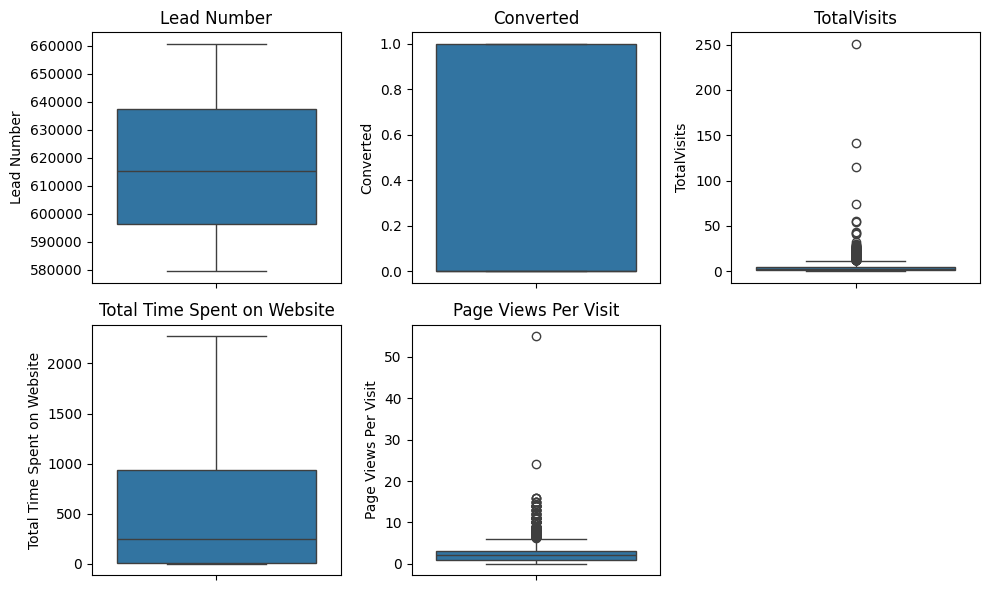

In [26]:
udf_plot_boxplots(df, num_cols=numerical_cols, cols=3)

In [27]:
for col in numerical_cols:
    
    lower_quantile=0.25
    upper_quantile=0.75
    iqr_multiplier=1.5

    Q1 = df[col].quantile(lower_quantile)
    Q3 = df[col].quantile(upper_quantile)
            
    IQR = Q3 - Q1   # Calculate the Interquartile Range (IQR)
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # Filter out rows with values outside the bounds
    df[col] = np.clip(df[col], lower_bound, upper_bound)

- Checking if outliers are successfully removed

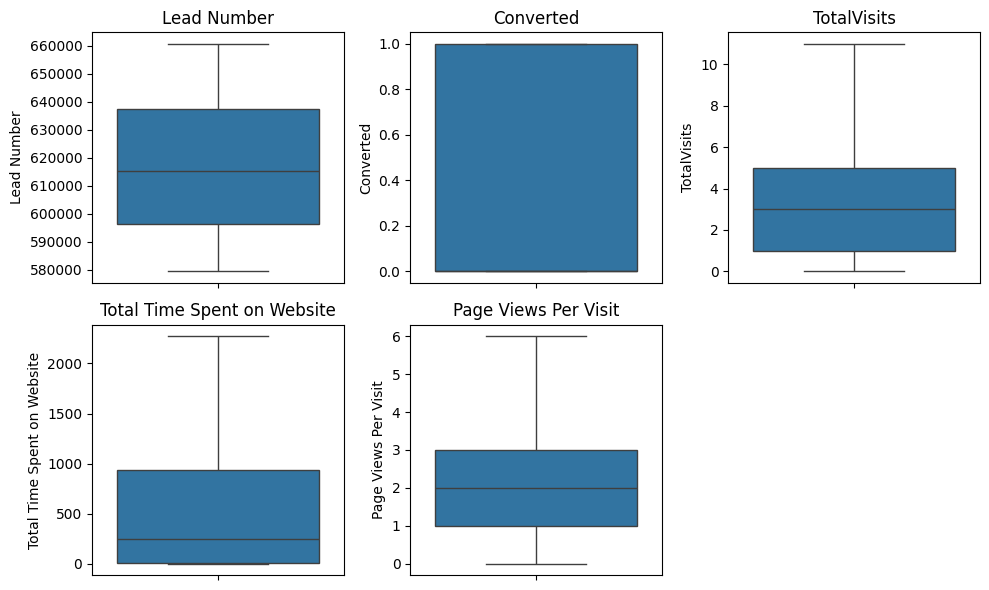

In [28]:
udf_plot_boxplots(df, num_cols=numerical_cols)

## 3.7 Looking at Spelling Errors & Similar String Values

In [29]:
# Checking value_counts for all categorical columns
for col in df[categorical_cols].columns[1:]:
    print(df[col].value_counts())
    print('\n')

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation      

In [30]:
# Combining 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace({'google': 'Google'})
df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

### 3.7.1 Reduce Categories in `Lead Source`

In [31]:
# Categories with less than 50 entries
low_freq_categories = df['Lead Source'].value_counts()[df['Lead Source'].value_counts() < 50].index

# Replacing these with 'Other'
df['Lead Source'] = df['Lead Source'].replace(low_freq_categories, 'Other')

df['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: count, dtype: int64

In [32]:
# Checking Lead Origin
df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [33]:
df.shape

(9240, 14)

# 4. EDA

## 4.1 Target Imbalance

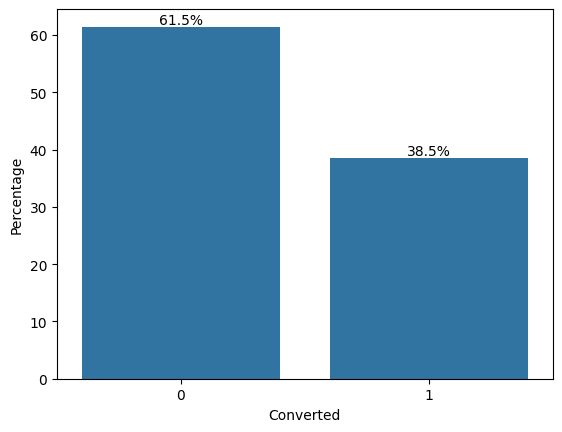

In [34]:
# Calculate percentage for each category in the 'Converted' column
percentage_data = df['Converted'].value_counts(normalize=True) * 100

# Plot barplot
sns.barplot(x=percentage_data.index, y=percentage_data.values)

# Set y-axis to percentage
plt.ylabel('Percentage')

# Annotate bars with percentage values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


## 4.2 Univariate Analysis - Numerical features

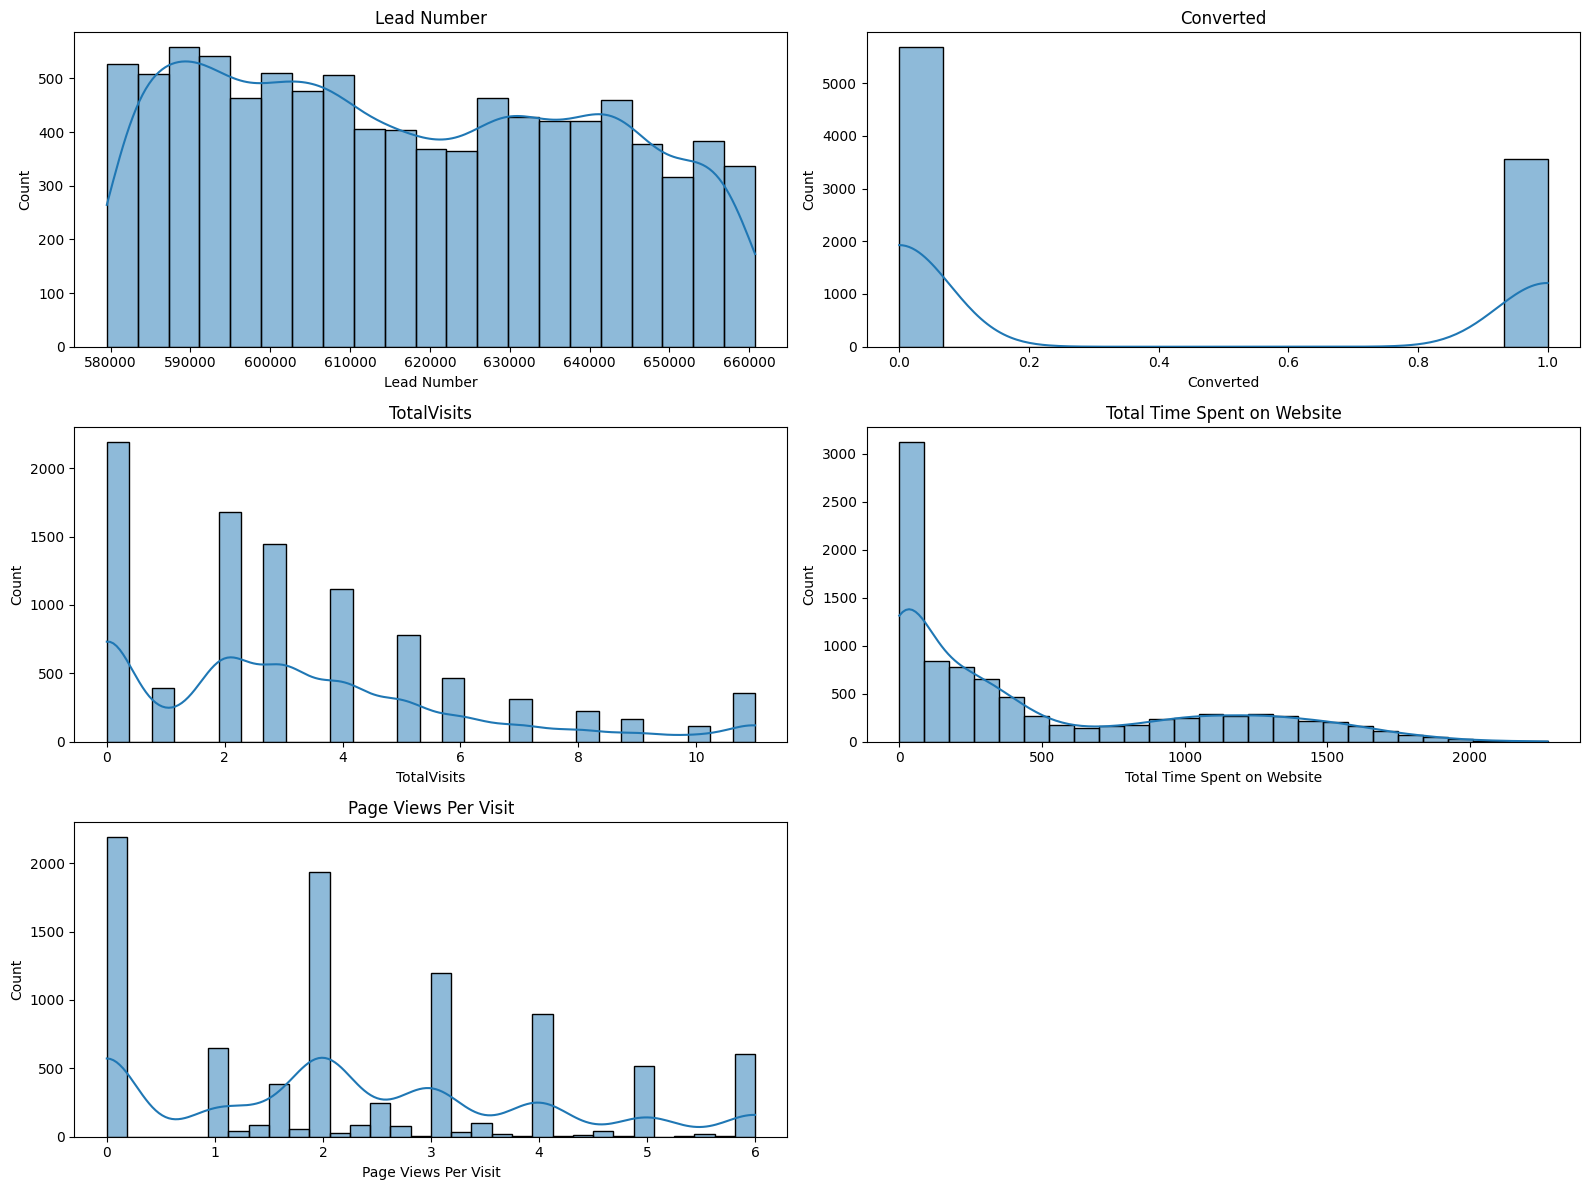

In [35]:
cols = 2

# Calculating the number of rows needed for subplots
rows = math.ceil(len(numerical_cols) / cols)

fig = plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()

## 4.3 Univariate Analysis - Categorical Features

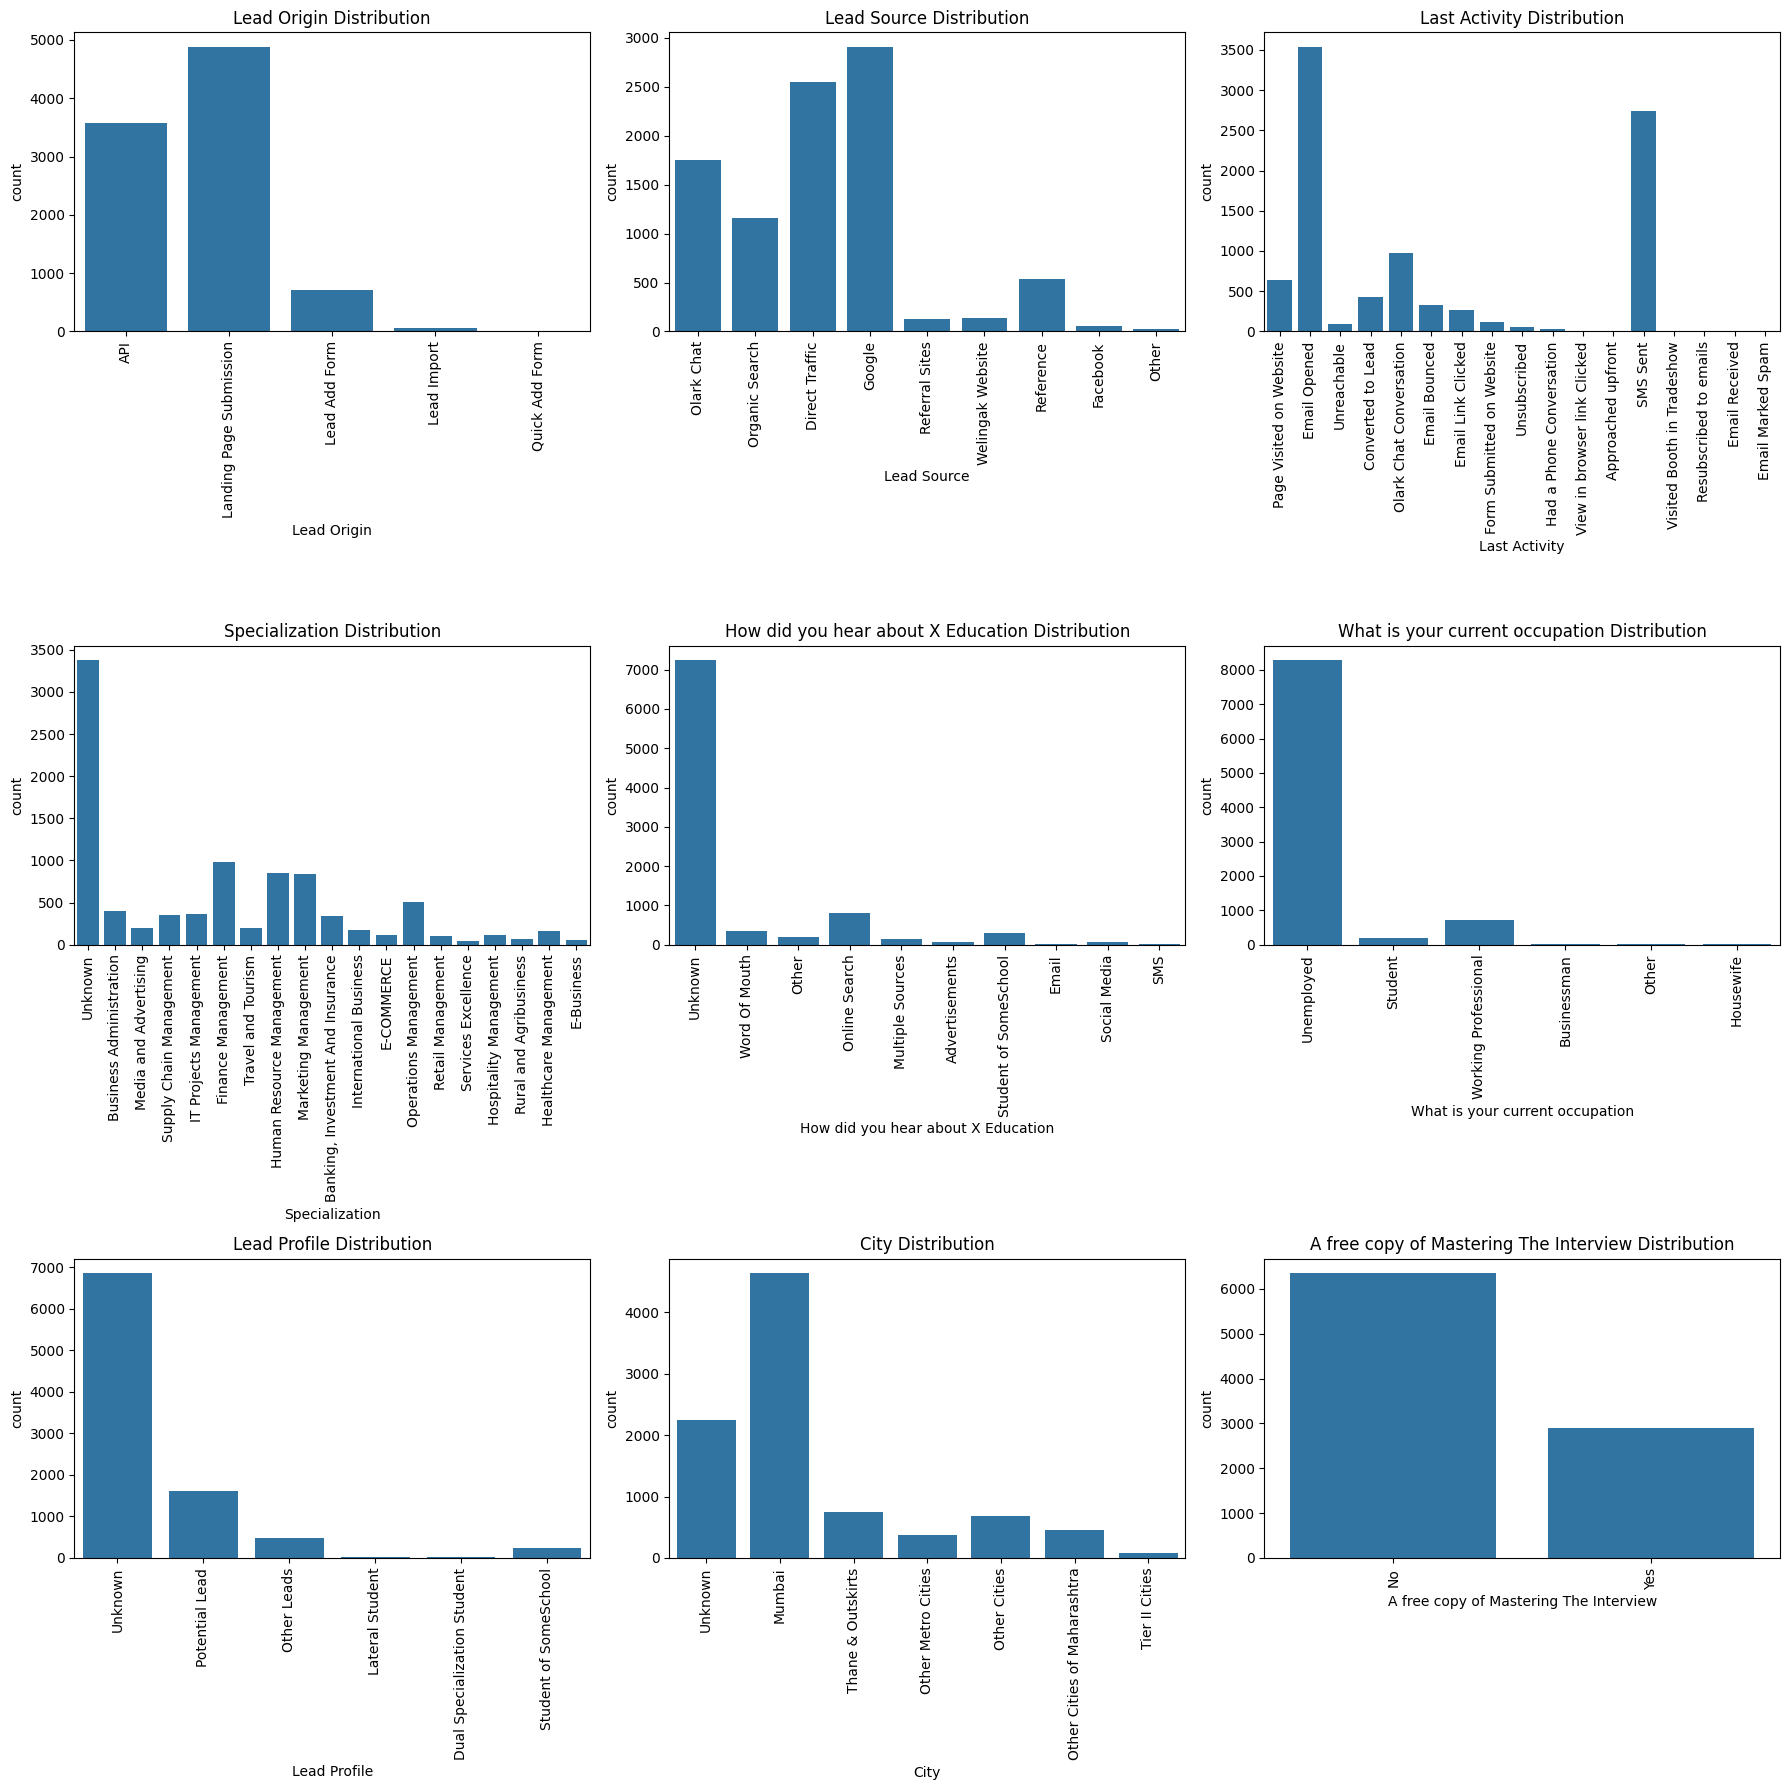

In [36]:
cols = 3

# Calculating the number of rows needed for subplots
rows = math.ceil(len(categorical_cols) / cols)

fig = plt.figure(figsize=(18, 18))

for i, col in enumerate(categorical_cols):
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.countplot(x=df[col], ax=ax)  # Use x= for vertical bars
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)  # Label the x-axis explicitly
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

## 4.4 Bivariate Analysis - Numerical Features

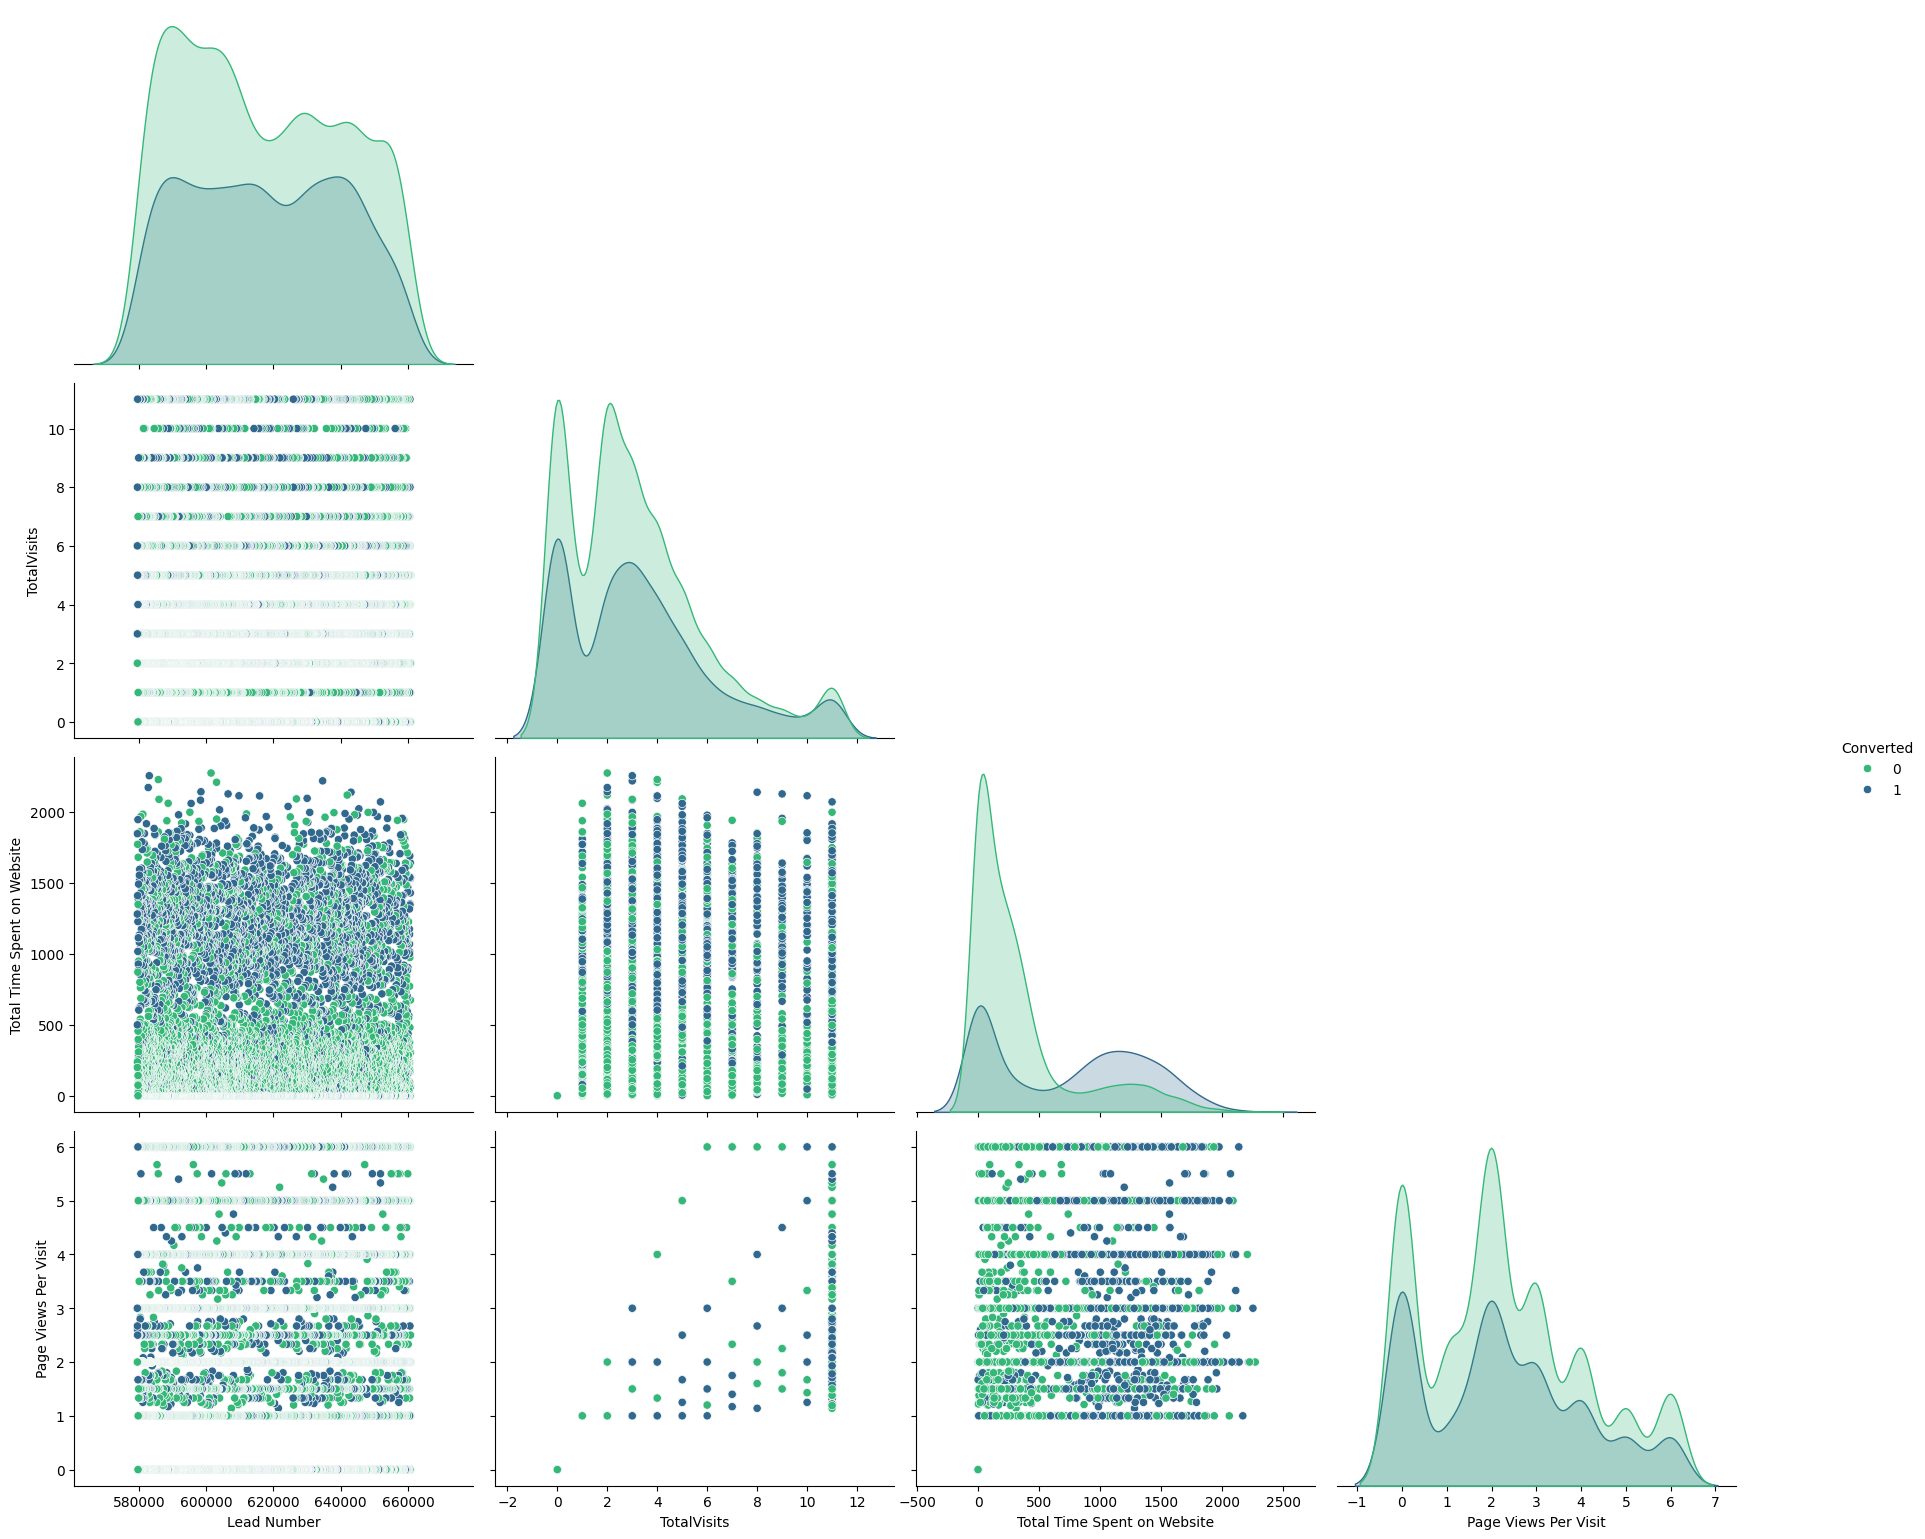

In [37]:
g = sns.pairplot(df[numerical_cols], hue='Converted', palette='viridis_r', corner=True)
g.figure.set_size_inches(20,16)
plt.show()

<Axes: ylabel='Total Time Spent on Website'>

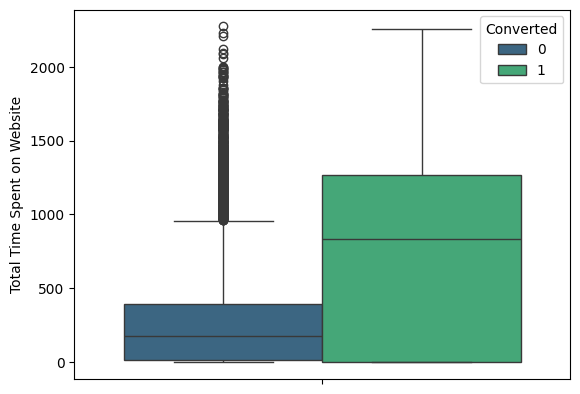

In [38]:
sns.boxplot(data=df, y='Total Time Spent on Website', hue='Converted', palette='viridis')

**OBSERVATION**
- The only pair showing somewhat linear relationship is between - `TotalVisits` & `Page Views Per Visit`
- Those who `Converted` to sale spent much more time on the Website

## 4.5 Multivariate Analysis

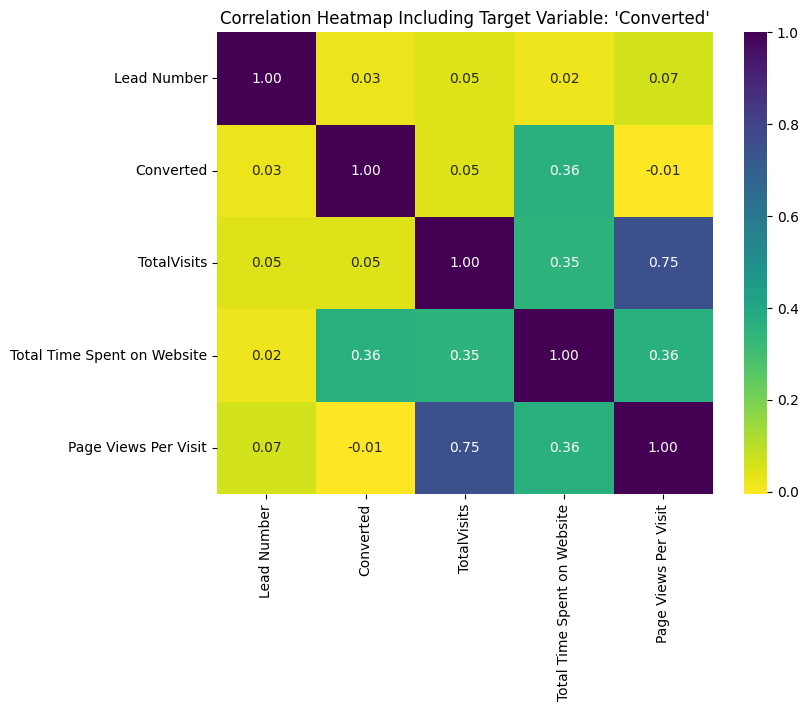

In [39]:
# Calculate correlation matrix including the target variable
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis_r', fmt=".2f")
plt.title("Correlation Heatmap Including Target Variable: 'Converted'")
plt.show()

**OBSERVATIONS**
- A high correlation can be seen between `Page Views Per Visit` & `Total Time Spent on Website`
- A good Correlation can also be seen between `Total Time Spent on Website` & `Converted` 

- This could imply that those who are highly interested to buy an education program visit the website often, or spend more time exploring the programs during their visits.

## 4.6 Correlation Heatmap - Segregated by Target Feature

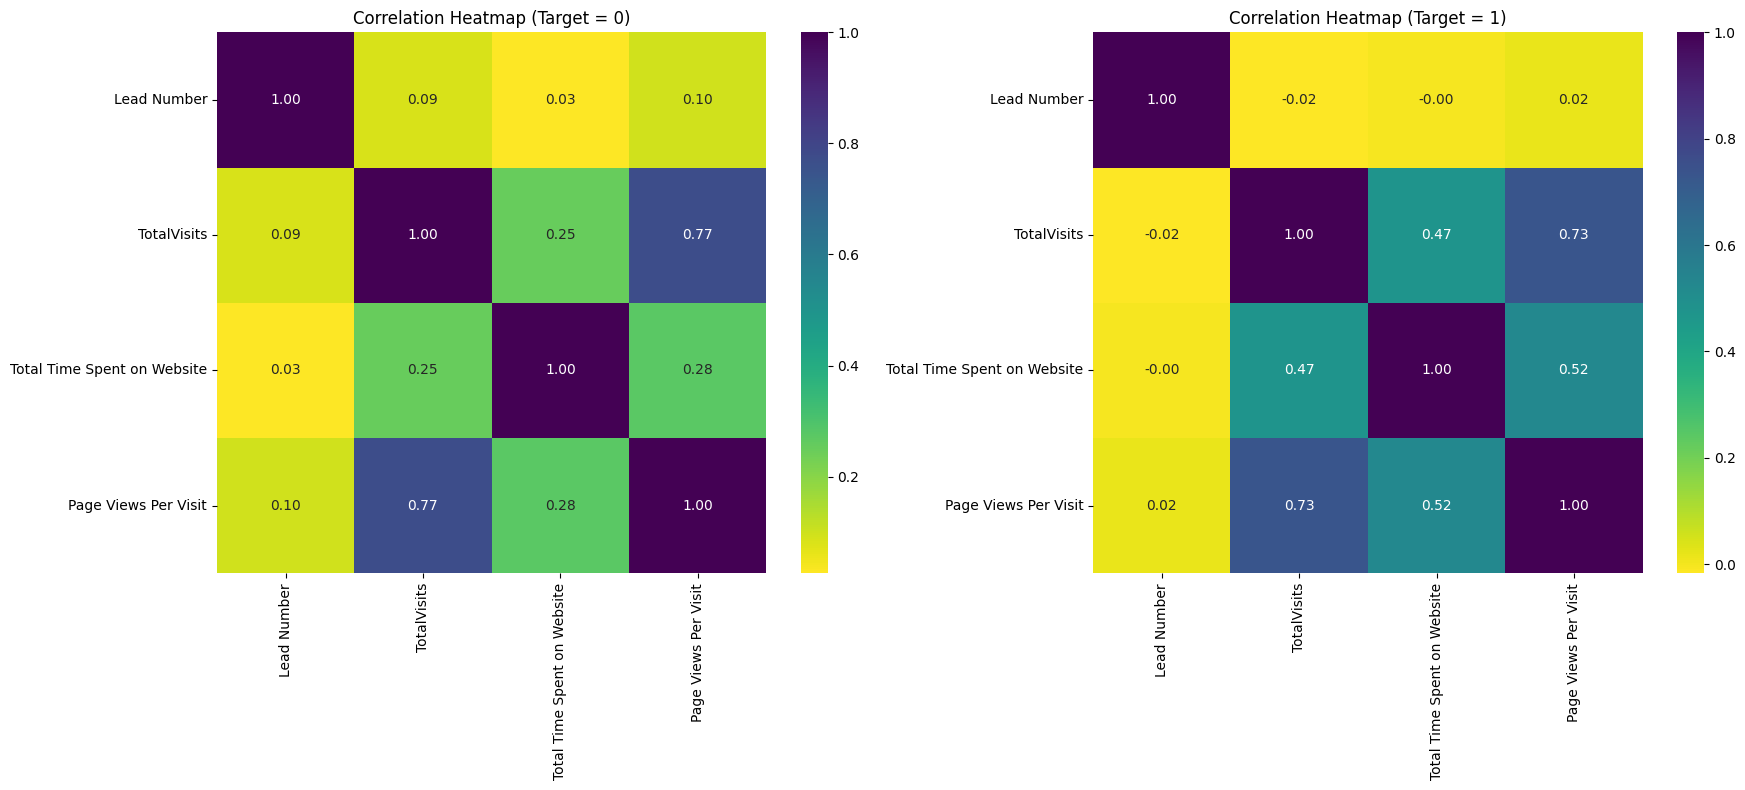

In [40]:
# Segregate dataset based on the target variable
df_target_0 = df[df['Converted'] == 0]  # Filter where target = 0
df_target_1 = df[df['Converted'] == 1]  # Filter where target = 1

# Calculate correlation matrices for each subset, excluding 'Converted'
corr_matrix_0 = df_target_0[numerical_cols].drop(columns=['Converted'], errors='ignore').corr()
corr_matrix_1 = df_target_1[numerical_cols].drop(columns=['Converted'], errors='ignore').corr()

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap for target = 0
sns.heatmap(corr_matrix_0, annot=True, cmap='viridis_r', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap (Target = 0)")

# Heatmap for target = 1
sns.heatmap(corr_matrix_1, annot=True, cmap='viridis_r', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap (Target = 1)")

plt.tight_layout()
plt.show()


**OBSERVATION**
- We see that for the `Converted`=1 , successfully Converted leads - there is a higher correlation between -

- - `Total Time Spent on Website` & `Page Views Per Visit` -> 0.52
- - `Total Time Spent on Website` & `TotalVisits` -> 0.47


as compared to non-converted leads.

In [41]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0        0.000                            0                 0.000   
1        5.000                          674                 2.500   
2        2.000                         1532                 2.000   
3        1.000                          305                 1.000   
4        2.000                         1428                 1.000   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education What is your current occupation  \
0                            Unknown                      Unemployed   
1                            Unknown                      Unemployed   
2                            Unknown                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

     Lead Profile     City A free copy of Mastering The Interview  
0         Unknown  Unknown                                     No  
1         Unknown  Unknown                                     No  
2  Potential Lead   Mumbai                                    Yes  
3         Unknown   Mumbai                                     No  
4         Unknown   Mumbai                                     No

In [42]:
df.shape

(9240, 14)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   How did you hear about X Education      9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [44]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview']

# 5. Model Building - Logistic Regression

In [45]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 5.1 One Hot Encoding

In [46]:
# Converting categorical variables into dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [47]:
# Setting `Lead Number` as the DataFrame index
df = df.set_index('Lead Number',drop=True)
numerical_cols.remove('Lead Number')

In [48]:
df.shape

(9240, 76)

In [49]:
df.head()

Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0        0.000                            0   
660728               0        5.000                          674   
660727               1        2.000                         1532   
660719               0        1.000                          305   
660681               1        2.000                         1428   

             Page Views Per Visit  Lead Origin_Landing Page Submission  \
Lead Number                                                              
660737                      0.000                                    0   
660728                      2.500                                    0   
660727                      2.000                                    1   
660719                      1.000                                    1   
660681                      1.000                                    1   

             Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
Lead Number                                                       
660737                               0                        0   
660728                               0                        0   
660727                               0                        0   
660719                               0                        0   
660681                               0                        0   

             Lead Origin_Quick Add Form  Lead Source_Facebook  \
Lead Number                                                     
660737                                0                     0   
660728                                0                     0   
660727                                0                     0   
660719                                0                     0   
660681                                0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
660737                        0                       1   
660728                        0                       0   
660727                        0                       0   
660719                        0                       0   
660681                        1                       0   

             Lead Source_Organic Search  Lead Source_Other  \
Lead Number                                                  
660737                                0                  0   
660728                                1                  0   
660727                                0                  0   
660719                                0                  0   
660681                                0                  0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
660737                           0                           0   
660728                           0                           0   
660727                           0                           0   
660719                           0                           0   
660681                           0                           0   

             Lead Source_Welingak Website  Last Activity_Converted to Lead  \
Lead Number                                                                  
660737                                  0                                0   
660728                                  0                                0   
660727                                  0                                0   
660719                                  0                                0   
660681                                  0                                1   

             Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
Lead Number                                                                  
660737                                 0                                 0  

### Correlation Heatmap of the Scaled-Dummified Dataframe - Training Features
- We plot a correlation heatmap to check for multi-collinearity

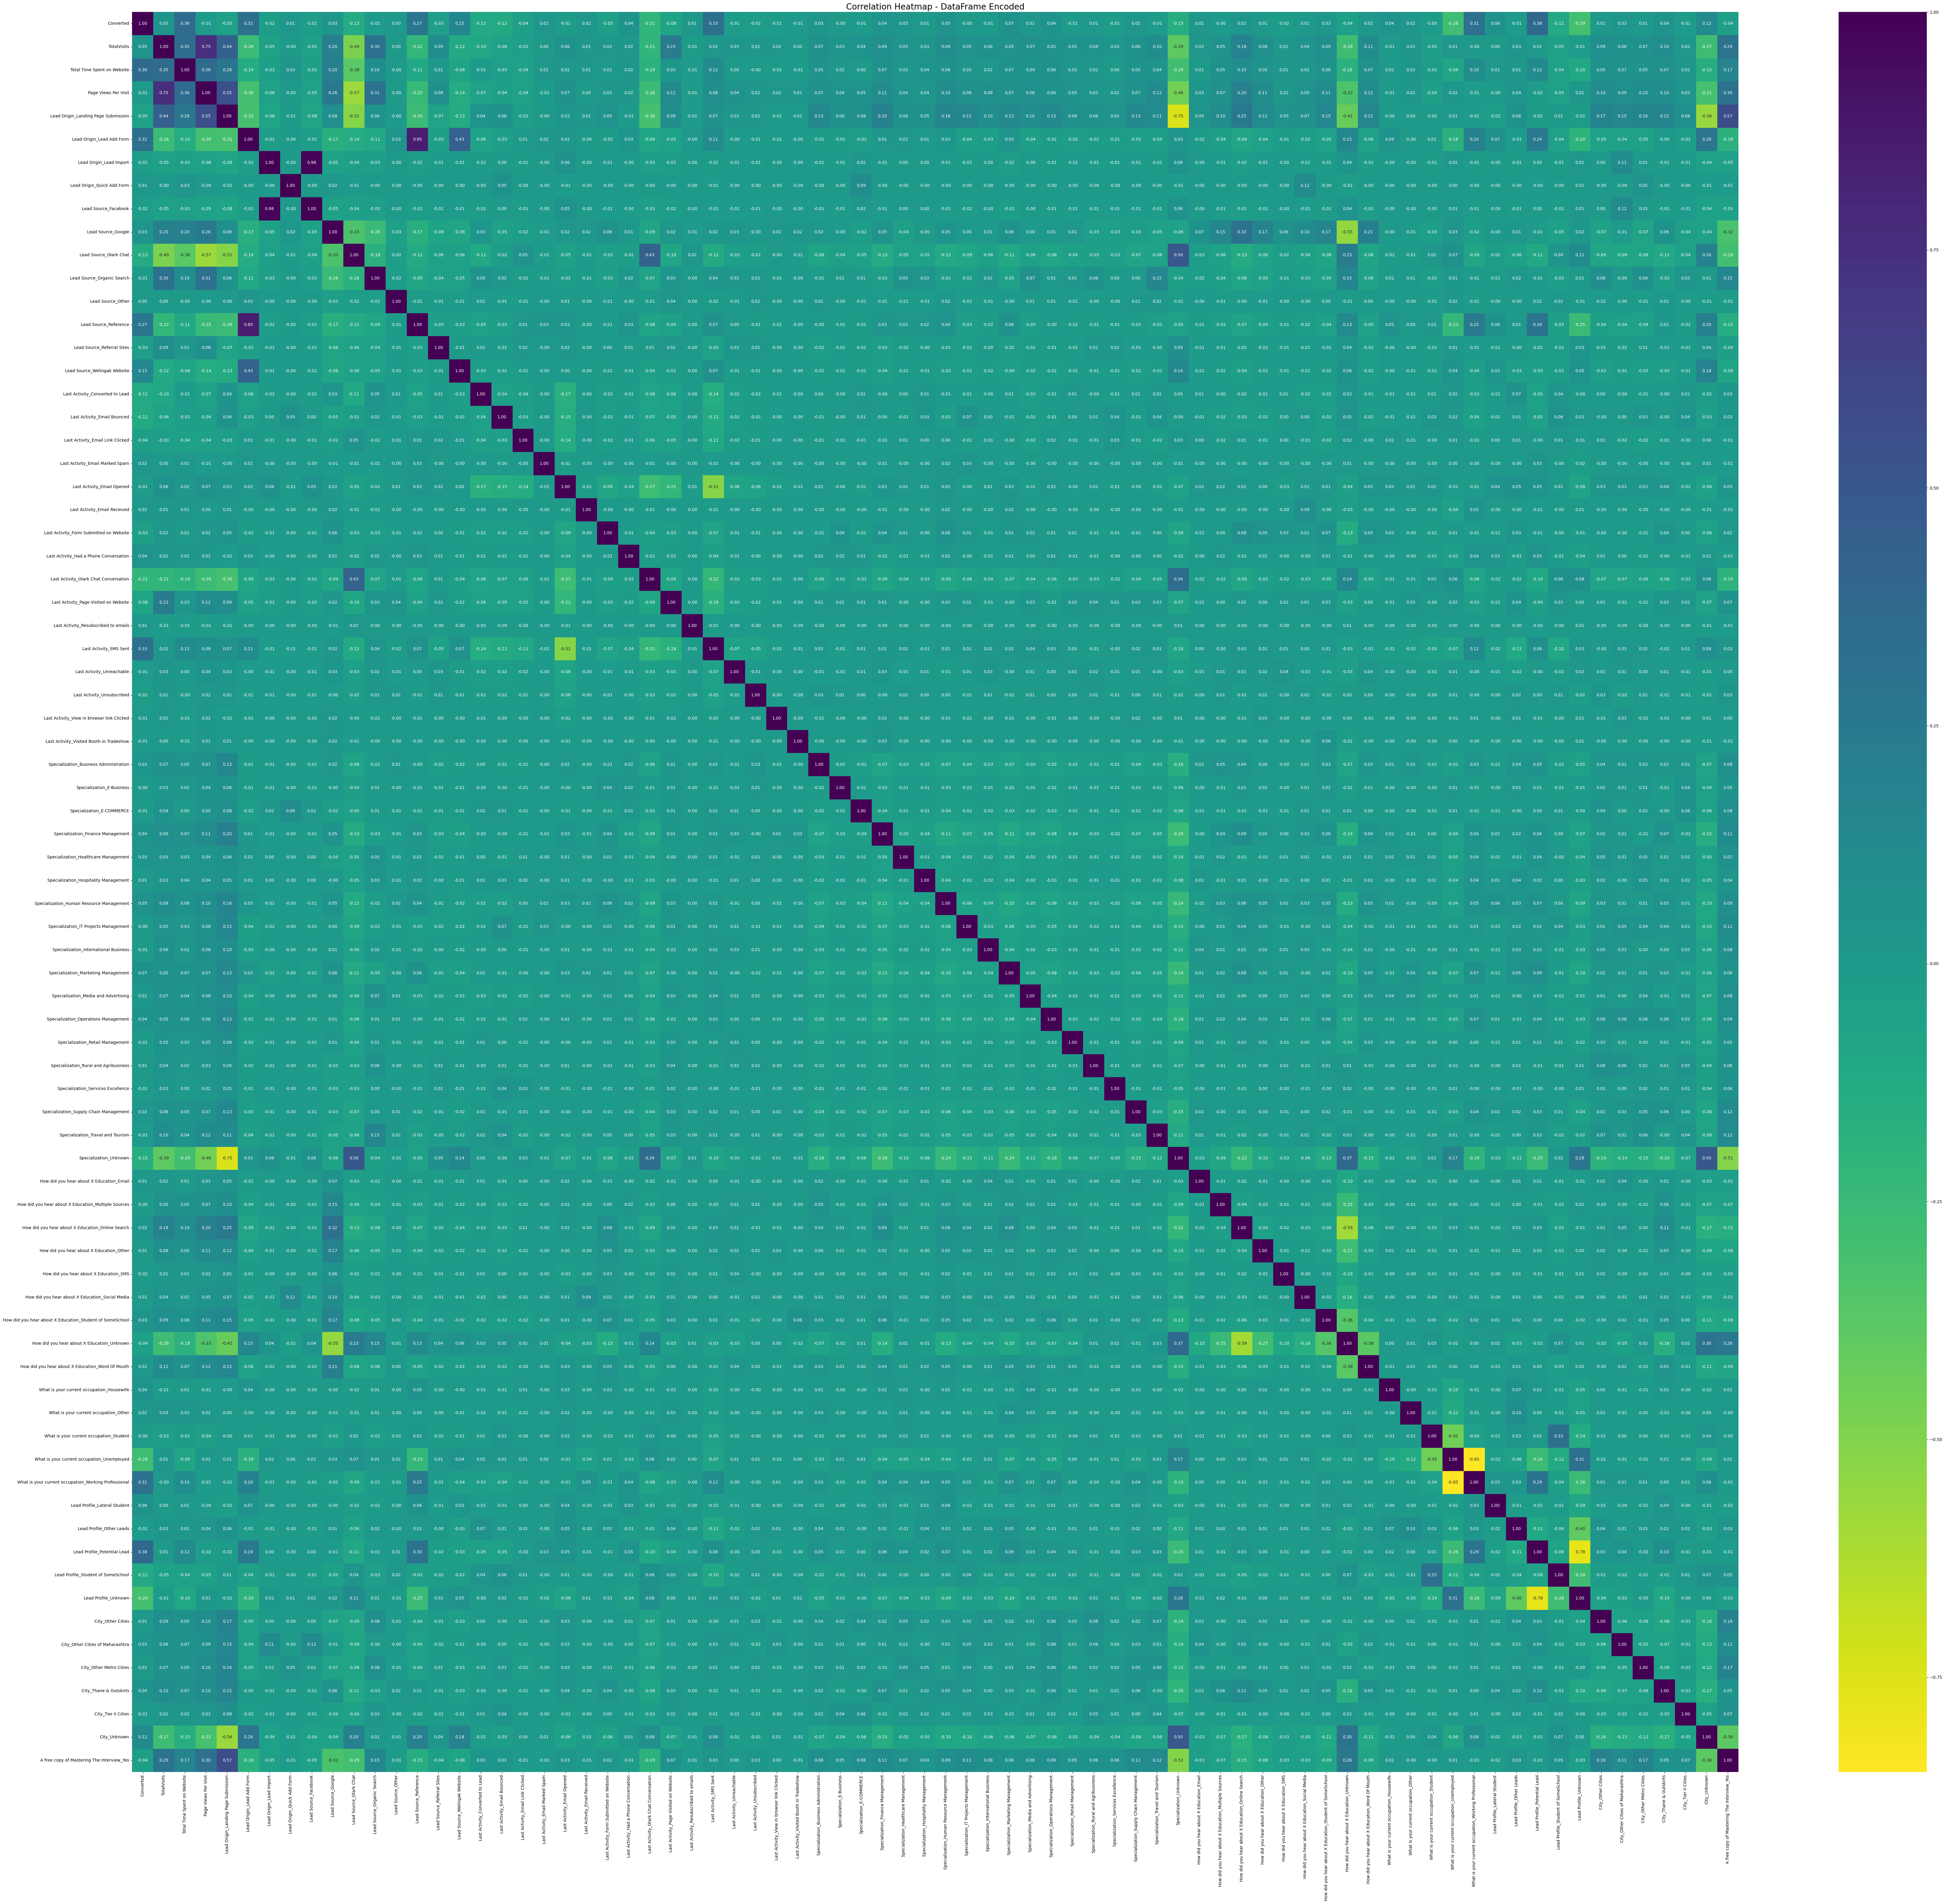

In [50]:
plt.figure(figsize = (72, 64), dpi=100)
sns.heatmap(df.corr(), annot = True, cmap="viridis_r", fmt=".2f")
plt.title('Correlation Heatmap - DataFrame Encoded', fontsize=20)
plt.tight_layout()
plt.show()

**OBSERVATIONS**
- There are too many features with extremely high correlation.
- It is difficult to manually check and drop these high-corr features
- We'll use RFE to reduce the number of features

## 5.2 Train Test Split

In [51]:
# Features (X) and target (y)
X = df.drop(columns='Converted')
y = df['Converted']

In [52]:
numerical_cols.remove('Converted')
numerical_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [53]:
# Splitting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensions of Train & Test Split
print('Train X Shape:', X_train.shape)
print('Test X Shape:', X_test.shape)
print('Train y Shape:', y_train.shape)
print('Test y Shape:', y_test.shape)

Train X Shape: (7392, 75)
Test X Shape: (1848, 75)
Train y Shape: (7392,)
Test y Shape: (1848,)


In [54]:
# Scaling only numerical columns
scaler = StandardScaler()

# Fit and transform numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [55]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
600123            -0.433                       -0.454                -0.150   
614204            -1.129                       -0.889                -1.273   
617857            -0.085                       -0.168                 0.412   
644758             0.263                        0.738                 0.973   
607605            -0.433                       -0.629                -0.150   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
600123                                         1                          0   
614204                                         0                          0   
617857                                         0                          0   
644758                                         1                          0   
607605                                         1                          0   

             Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
Lead Number                                                        
600123                             0                           0   
614204                             0                           0   
617857                             0                           0   
644758                             0                           0   
607605                             0                           0   

             Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                                                     
600123                          0                   0                       0   
614204                          0                   0                       1   
617857                          0                   1                       0   
644758                          0                   1                       0   
607605                          0                   0                       0   

             Lead Source_Organic Search  Lead Source_Other  \
Lead Number                                                  
600123                                1                  0   
614204                                0                  0   
617857                                0                  0   
644758                                0                  0   
607605                                0                  0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
600123                           0                           0   
614204                           0                           0   
617857                           0                           0   
644758                           0                           0   
607605                           0                           0   

             Lead Source_Welingak Website  Last Activity_Converted to Lead  \
Lead Number                                                                  
600123                                  0                                0   
614204                                  0                                0   
617857                                  0                                0   
644758                                  0                                0   
607605                                  0                                1   

             Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
Lead Number                                                                  
600123                                 0                                 0   
614204                                 0                                 0   
617857                                 0                                 0   
644758                   

## 5.3 Recursive Feature Elimination (RFE)

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define a logistic regression estimator WITH regularization
estimator = LogisticRegression(
    penalty='l2',            # Use the more stable L2 penalty.
    solver='liblinear',      # An excellent, warning-free solver.
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

# Perform RFE to select the top 12 features
selector = RFE(estimator, n_features_to_select=12)
selector = selector.fit(X_train, y_train)

In [57]:
# Get the selected features
selected_features = X_train.columns[selector.support_]
selected_features

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [58]:
def udf_calculate_vif(X):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in the dataset.

    The VIF measures how much the variance of a regression coefficient is inflated due to collinearity with other features. 
    Higher VIFs suggest multicollinearity, where features are highly correlated.

    Parameters:
    X : pandas.DataFrame
        Features dataframe (excluding the target variable).

    Returns:
    pandas.DataFrame
        DataFrame containing the VIF values for each feature, sorted in descending order.
    """
    # Create a dataframe to hold the VIF data
    vif_data = pd.DataFrame()
    
    # Calculate the VIF for each feature
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Sort the VIF values in descending order
    return vif_data.sort_values("VIF", ascending=False)

Subset the `Train`& `Test`dataframes with only `selected_features`from RFE

In [59]:
# Filter selected features from dataframe for model building
X_train = X_train[selected_features]
X_test = X_test[selected_features]

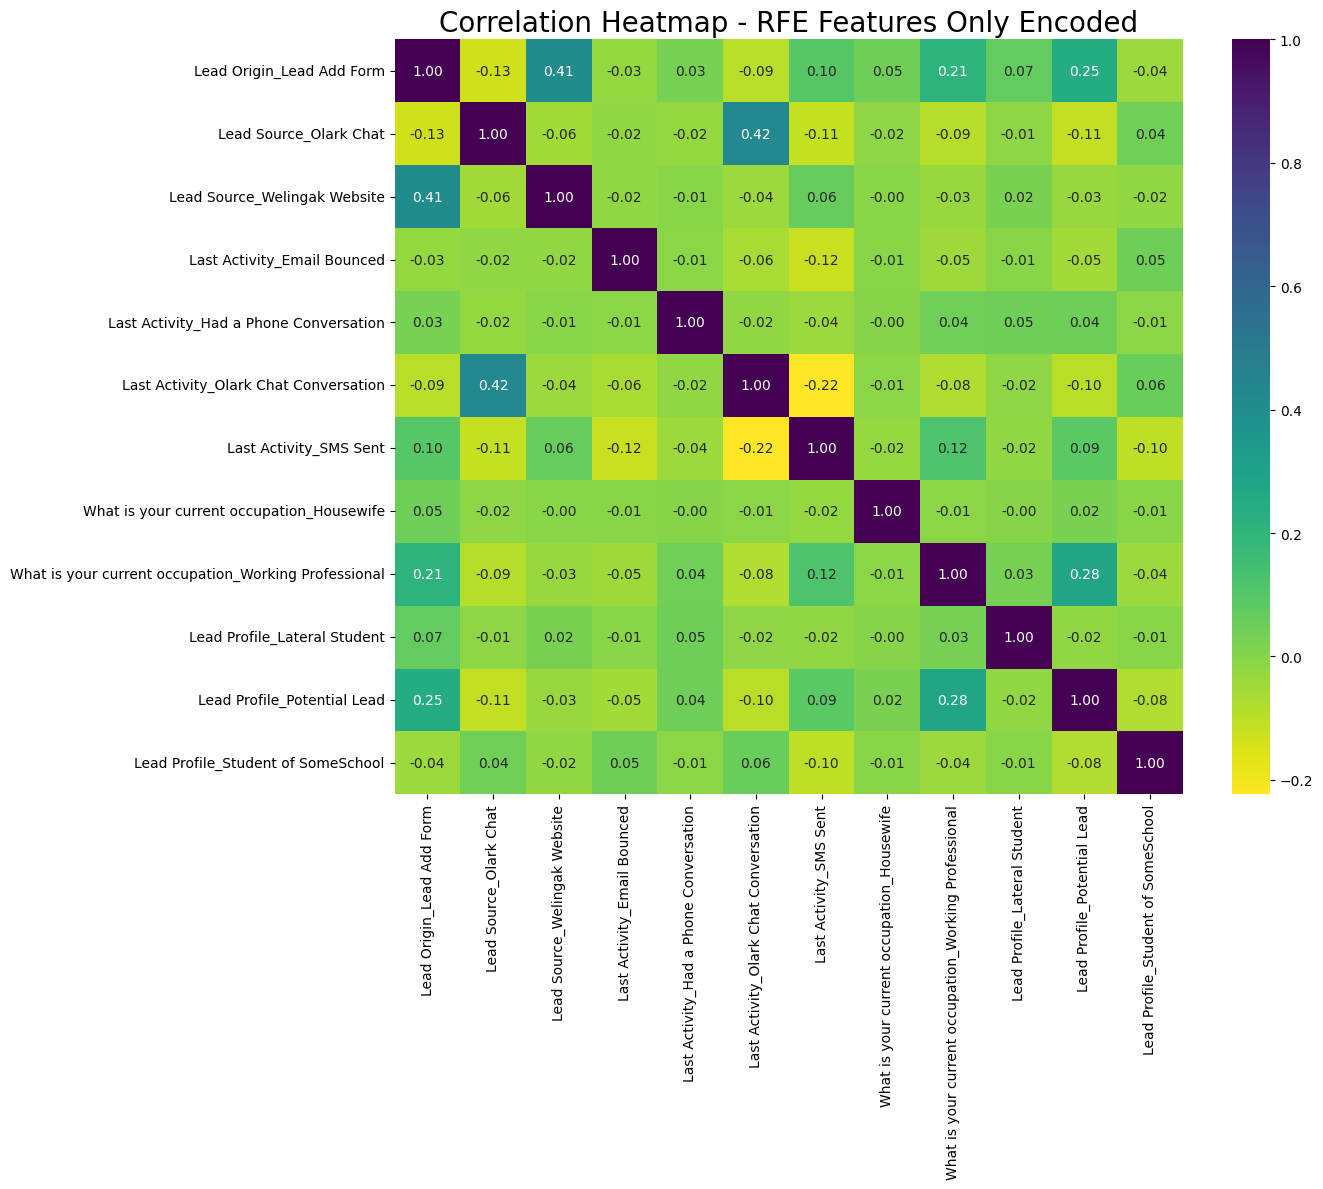

In [60]:
plt.figure(figsize = (14, 12))
sns.heatmap(X_train.corr(),cmap='viridis_r',annot=True, fmt=".2f")
plt.title('Correlation Heatmap - RFE Features Only Encoded', fontsize=20)
plt.tight_layout()
plt.show()

## 5.4 Building Models

### Model 1

In [61]:
# Fit logistic regression model
X_train_sm = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3504.7
Date:                Tue, 05 Aug 2025   Deviance:                       7009.4
Time:                        15:26:31   Pearson chi2:                 8.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3171
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3822      0.045    -30.628      0.000      -1.471      -1.294
Lead Origin_Lead Add Form                                2.0891      0.178     11.719      0.000       1.740       2.438
Lead Source_Olark Chat                                   0.1099      0.083      1.327      0.185      -0.052       0.272
Lead Source_Welingak Website                             3.2587      1.023      3.186      0.001       1.254       5.264
Last Activity_Email Bounced                             -1.5861      0.264     -6.013      0.000      -2.103      -1.069
Last Activity_Had a Phone Conversation                   1.7418      0.558      3.123      0.002       0.649       2.835
Last Activity_Olark Chat Conversation                   -1.2991      0.146     -8.912      0.000      -1.585      -1.013
Last Activity_SMS Sent                                   1.2893      0.063     20.370      0.000       1.165       1.413
What is your current occupation_Housewife               22.8537    1.3e+04      0.002      0.999   -2.54e+04    2.55e+04
What is your current occupation_Working Professional     2.4530      0.164     14.920      0.000       2.131       2.775
Lead Profile_Lateral Student                             2.9761      1.081      2.753      0.006       0.857       5.095
Lead Profile_Potential Lead                              1.8411      0.083     22.216      0.000       1.679       2.004
Lead Profile_Student of SomeSchool                      -2.0010      0.426     -4.700      0.000      -2.835      -1.167
========================================================================================================================
"""

In [62]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                               const 2.298
1                           Lead Origin_Lead Add Form 1.371
6               Last Activity_Olark Chat Conversation 1.283
3                        Lead Source_Welingak Website 1.244
2                              Lead Source_Olark Chat 1.238
11                        Lead Profile_Potential Lead 1.166
9   What is your current occupation_Working Profes... 1.136
7                              Last Activity_SMS Sent 1.103
4                         Last Activity_Email Bounced 1.030
12                 Lead Profile_Student of SomeSchool 1.018
10                       Lead Profile_Lateral Student 1.011
5              Last Activity_Had a Phone Conversation 1.009
8           What is your current occupation_Housewife 1.005

**OBSERVATIONS**
- Features with very high p-values are not significant 
- We will start with dropping - `What is your current occupation_Housewife`

In [63]:
X_train = X_train.drop(columns='What is your current occupation_Housewife')
X_test = X_test.drop(columns='What is your current occupation_Housewife')

### Model 2

In [64]:
# Build 2nd Model
X_train_sm = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3513.0
Date:                Tue, 05 Aug 2025   Deviance:                       7026.0
Time:                        15:26:31   Pearson chi2:                 8.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3155
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3747      0.045    -30.541      0.000      -1.463      -1.286
Lead Origin_Lead Add Form                                2.1086      0.178     11.854      0.000       1.760       2.457
Lead Source_Olark Chat                                   0.1055      0.083      1.275      0.202      -0.057       0.268
Lead Source_Welingak Website                             3.2335      1.023      3.161      0.002       1.229       5.238
Last Activity_Email Bounced                             -1.5952      0.264     -6.044      0.000      -2.112      -1.078
Last Activity_Had a Phone Conversation                   1.7346      0.558      3.111      0.002       0.642       2.828
Last Activity_Olark Chat Conversation                   -1.3035      0.146     -8.945      0.000      -1.589      -1.018
Last Activity_SMS Sent                                   1.2821      0.063     20.276      0.000       1.158       1.406
What is your current occupation_Working Professional     2.4474      0.164     14.888      0.000       2.125       2.770
Lead Profile_Lateral Student                             2.9680      1.081      2.745      0.006       0.849       5.087
Lead Profile_Potential Lead                              1.8404      0.083     22.232      0.000       1.678       2.003
Lead Profile_Student of SomeSchool                      -2.0074      0.426     -4.713      0.000      -2.842      -1.173
========================================================================================================================
"""

In [65]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                               const 2.294
1                           Lead Origin_Lead Add Form 1.367
6               Last Activity_Olark Chat Conversation 1.283
3                        Lead Source_Welingak Website 1.244
2                              Lead Source_Olark Chat 1.238
10                        Lead Profile_Potential Lead 1.166
8   What is your current occupation_Working Profes... 1.135
7                              Last Activity_SMS Sent 1.102
4                         Last Activity_Email Bounced 1.030
11                 Lead Profile_Student of SomeSchool 1.018
9                        Lead Profile_Lateral Student 1.011
5              Last Activity_Had a Phone Conversation 1.009

**OBSERVATIONS**
- We will drop - `Lead Source_Olark Chat`

In [66]:
X_train = X_train.drop(columns='Lead Source_Olark Chat')
X_test = X_test.drop(columns='Lead Source_Olark Chat')

### Model 3

In [67]:
# Build 3rd Model
X_train_sm = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7381
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3513.8
Date:                Tue, 05 Aug 2025   Deviance:                       7027.7
Time:                        15:26:31   Pearson chi2:                 8.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3154
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3573      0.043    -31.719      0.000      -1.441      -1.273
Lead Origin_Lead Add Form                                2.0947      0.178     11.801      0.000       1.747       2.443
Lead Source_Welingak Website                             3.2306      1.023      3.159      0.002       1.226       5.235
Last Activity_Email Bounced                             -1.5951      0.264     -6.045      0.000      -2.112      -1.078
Last Activity_Had a Phone Conversation                   1.7219      0.557      3.092      0.002       0.630       2.813
Last Activity_Olark Chat Conversation                   -1.2498      0.139     -8.961      0.000      -1.523      -0.976
Last Activity_SMS Sent                                   1.2804      0.063     20.262      0.000       1.157       1.404
What is your current occupation_Working Professional     2.4405      0.164     14.854      0.000       2.119       2.763
Lead Profile_Lateral Student                             2.9690      1.081      2.746      0.006       0.850       5.088
Lead Profile_Potential Lead                              1.8338      0.083     22.216      0.000       1.672       1.996
Lead Profile_Student of SomeSchool                      -2.0008      0.426     -4.701      0.000      -2.835      -1.167
========================================================================================================================
"""

In [68]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                               const 2.096
1                           Lead Origin_Lead Add Form 1.360
2                        Lead Source_Welingak Website 1.243
9                         Lead Profile_Potential Lead 1.164
7   What is your current occupation_Working Profes... 1.134
6                              Last Activity_SMS Sent 1.102
5               Last Activity_Olark Chat Conversation 1.076
3                         Last Activity_Email Bounced 1.030
10                 Lead Profile_Student of SomeSchool 1.018
8                        Lead Profile_Lateral Student 1.011
4              Last Activity_Had a Phone Conversation 1.008

**OBSERVATIONS**
- Everything looks good here

- - All p-values within acceptable limits
- - All VIF values below 5

### Final Model
Saving `model_3` as the final model for prediction and evaluation

In [69]:
final_model = model_3

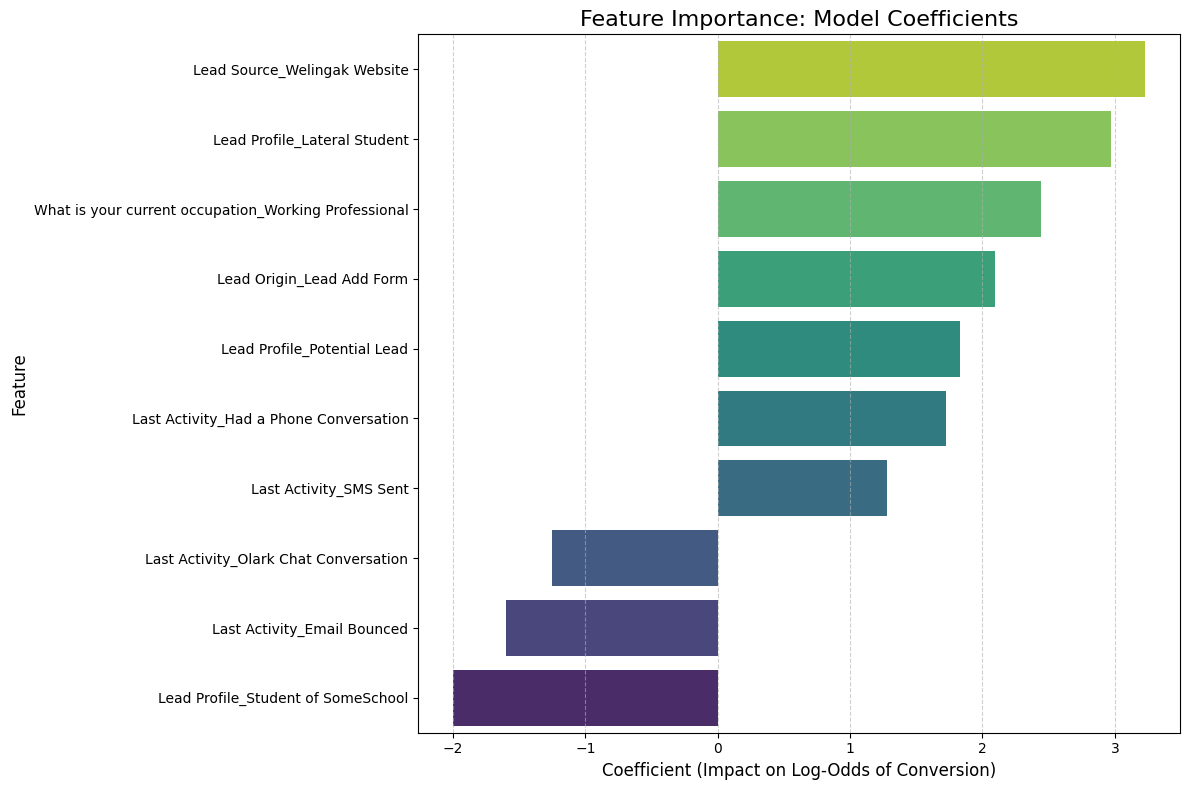

In [70]:
# Generate Feature Importance Plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the coefficients from the final model
# We drop the 'const' because it's the intercept, not a feature.
coefficients = model_3.params.drop('const')

# 2. Create a DataFrame for easy plotting and sort by coefficient value
coeff_df = pd.DataFrame({'Feature': coefficients.index, 'Coefficient': coefficients.values})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# 3. Create the plot (This is the updated line)
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, hue='Feature', palette="viridis_r", legend=False)

plt.title('Feature Importance: Model Coefficients', fontsize=16)
plt.xlabel('Coefficient (Impact on Log-Odds of Conversion)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

### Add a constant to the test set for evaluation

In [71]:
X_test_sm = sm.add_constant(X_test)

# 6. Model Evaluation

- Since p-values and VIFs seem good, we can proceed with making predictions with the latest stable model.
- We'll first test with threshold of 0.5, before checking with optimal threshold

## Quick Metrics Comparison - Training vs Test
We do a quick comparison of the Metrics before a deep-dive.

In [72]:
# Predictions on Training Data
y_train_pred = final_model.predict(X_train_sm)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Predictions on Test Data
y_test_pred = final_model.predict(X_test_sm)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Print Training Performance
print("Training Performance:")
print(classification_report(y_train, y_train_pred_binary))
print("Confusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred_binary))

print('-'*50)

# Print Test Performance
print("Test Performance:")
print(classification_report(y_test, y_test_pred_binary))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_binary))

Training Performance:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      4572
           1       0.83      0.51      0.63      2820

    accuracy                           0.77      7392
   macro avg       0.79      0.72      0.73      7392
weighted avg       0.78      0.77      0.76      7392

Confusion Matrix (Training):
[[4271  301]
 [1391 1429]]
--------------------------------------------------
Test Performance:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1107
           1       0.86      0.54      0.66       741

    accuracy                           0.78      1848
   macro avg       0.81      0.74      0.75      1848
weighted avg       0.80      0.78      0.77      1848

Confusion Matrix (Test):
[[1042   65]
 [ 343  398]]


## 6.1 Cross Validation Scores on Training Dataset

In [73]:
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# stratified k-fold ensures each fold keeps the same class ratio
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# logistic regression with l2 regularization and class balancing
final_estimator = LogisticRegression(
    penalty='l2',        # ridge regularization for stability
    solver='liblinear',  # reliable solver for small/medium data
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  
)

# using the 'with warnings.catch_warnings()' block to locally suppress
# the benign runtime warnings caused by zero-variance folds.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    cv_scores = cross_val_score(final_estimator, X_train, y_train, cv=cv, scoring='accuracy')

# print cv results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 2 * 100:.2f}%)")


Cross-Validation Scores: [0.76876268 0.77146721 0.77266576 0.77266576 0.77401894]
Mean CV Accuracy: 77.19% (+/- 0.35%)


## 6.2 New DataFrame for Predictions - Training Set

In [74]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = final_model.predict(X_train_sm)
y_train_pred[:10]

Lead Number
600123   0.481
614204   0.069
617857   0.034
644758   0.914
607605   0.205
598887   0.205
656354   0.205
623664   0.205
658048   0.205
645960   0.034
dtype: float64

In [75]:
y_train_pred_df = pd.DataFrame({'Lead Number':y_train_pred.index,'Converted':y_train.values,'Conversion_Prob':y_train_pred.values})
y_train_pred_df.head()

Lead Number  Converted  Conversion_Prob
0       600123          0            0.481
1       614204          0            0.069
2       617857          0            0.034
3       644758          1            0.914
4       607605          0            0.205

### Creating new column 'Predicted' with 1 if Pred_Prob > 0.5 else 0

In [76]:
y_train_pred_df['Predicted'] = y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted
0       600123          0            0.481          0
1       614204          0            0.069          0
2       617857          0            0.034          0
3       644758          1            0.914          1
4       607605          0            0.205          0

## 6.3 Evaluation Metrics

### Classification Report & Confusion Matrix - Train Set

In [77]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Print Training Performance
print("Training Performance:")
classification_report = metrics.classification_report(y_train_pred_df['Converted'], y_train_pred_df['Predicted'])
print(classification_report)

print("Confusion Matrix (Training):")
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Predicted'])
print(confusion_matrix)

Training Performance:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      4572
           1       0.83      0.51      0.63      2820

    accuracy                           0.77      7392
   macro avg       0.79      0.72      0.73      7392
weighted avg       0.78      0.77      0.76      7392

Confusion Matrix (Training):
[[4271  301]
 [1391 1429]]


### Accuracy

In [78]:
round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted']), 4)

0.7711

### Other Evaluation Metrics

In [79]:
# Let's evaluate the other metrics as well

TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Sensitivity : (Recall)

In [80]:
round(TP/(TP+FN), 4)

np.float64(0.5067)

### Specificity

In [81]:
round(TN/(TN+FP), 4)

np.float64(0.9342)

### False Postive Rate : (1 - Specificity)

In [82]:
# Predicting conversion when customer doesn't convert
round(FP/ (TN+FP), 4)

np.float64(0.0658)

### Positive predictive value : (Precision)

In [83]:
round(TP / (TP+FP), 4)

np.float64(0.826)

### Negative predictive value

In [84]:
round(TN / (TN+ FN), 4)

np.float64(0.7543)

## 6.4 Plot ROC AUC

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def udf_plot_roc_auc(y_actual, y_pred_prob):
    """
    Calculate and plot the ROC curve and AUC for a classification model.

    Parameters:
    -----------
    y_actual : array-like
        Actual labels (0 or 1) from the dataset.
    y_pred_prob : array-like
        Predicted probabilities for the positive class (1).

    Returns:
    --------
    roc_auc : float
        AUC value showing how well the model distinguishes classes.
    """
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_actual, y_pred_prob, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    return None

Training Performance:


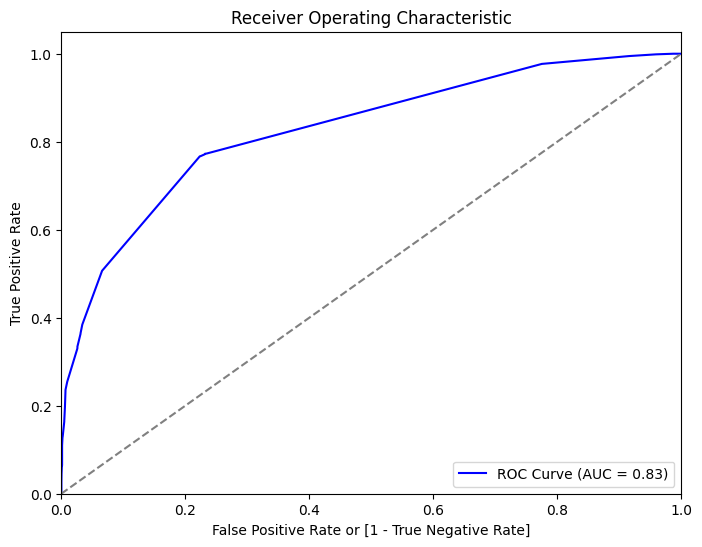

In [86]:
print("Training Performance:")
udf_plot_roc_auc(y_train_pred_df['Converted'], y_train_pred_df['Conversion_Prob'])

**OBSERVATIONS**
- The ROC curve with an AUC of 0.83 indicates that the logistic regression model is performing very well. 
- This means the model is highly accurate in distinguishing between positive and negative classes. It has a strong ability to correctly classify instances into their respective categories.

#### For above evaluation, we chose a threshold value of 0.5. Below we'll try to find the optimal threshold value.

## 6.5 Finding Optimal Cutoff probability

In [87]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600123           0             0.481           0      1      1   
1        614204           0             0.069           0      1      0   
2        617857           0             0.034           0      1      0   
3        644758           1             0.914           1      1      1   
4        607605           0             0.205           0      1      1   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  
0      1      1      1      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      1      1      1      1      1      1      1      1  
4      1      0      0      0      0      0      0      0

### 6.5.1 Probabilty, Accuracy, Sensitivity, and Specificity at different cut-offs

In [88]:
# Creating dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

       probability  accuracy  sensitivity  specificity
0.000        0.000     0.381        1.000        0.000
0.100        0.100     0.511        0.977        0.224
0.200        0.200     0.512        0.977        0.225
0.300        0.300     0.770        0.771        0.769
0.400        0.400     0.773        0.767        0.776
0.500        0.500     0.771        0.507        0.934
0.600        0.600     0.771        0.504        0.935
0.700        0.700     0.738        0.365        0.969
0.800        0.800     0.729        0.333        0.974
0.900        0.900     0.704        0.236        0.993


### 6.5.2 Visualisation of above Metrics

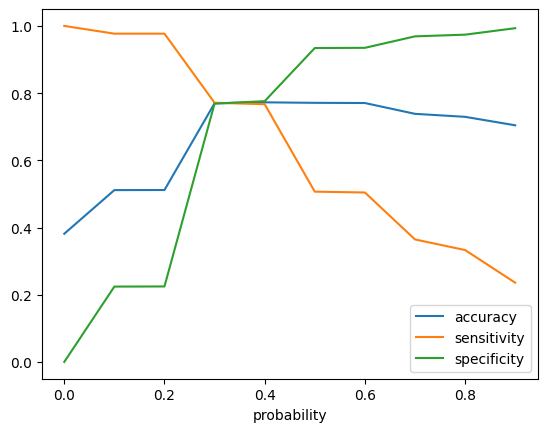

In [89]:
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

From above plot, we can see that all 3 curves intersect at about 0.35

### Adding a Prediction based on Accuracy-Sensitivity-Specificity

In [90]:
y_train_pred_df['Predicted_ass'] = y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_df.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600123           0             0.481           0      1      1   
1        614204           0             0.069           0      1      0   
2        617857           0             0.034           0      1      0   
3        644758           1             0.914           1      1      1   
4        607605           0             0.205           0      1      1   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900   Predicted_ass  
0      1      1      1      0      0      0      0      0               1  
1      0      0      0      0      0      0      0      0               0  
2      0      0      0      0      0      0      0      0               0  
3      1      1      1      1      1      1      1      1               1  
4      1      0      0      0      0      0      0      0               0

In [91]:
round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted_ass']), 4)

0.7723

### 6.5.3 Precision & Recall Tradeoff

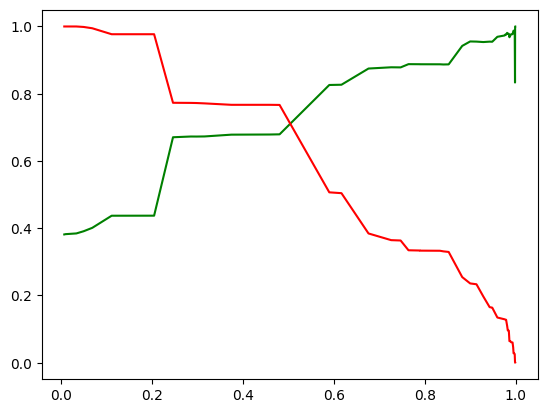

In [92]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df['Converted'], y_train_pred_df['Conversion_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- From above Precision-Recall curve, we can see that the optimal cut-off is around 0.5

### Adding a Prediction based on Precision-Recall

In [93]:
y_train_pred_df['Predicted_pr'] = y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600123           0             0.481           0      1      1   
1        614204           0             0.069           0      1      0   
2        617857           0             0.034           0      1      0   
3        644758           1             0.914           1      1      1   
4        607605           0             0.205           0      1      1   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900   Predicted_ass  \
0      1      1      1      0      0      0      0      0               1   
1      0      0      0      0      0      0      0      0               0   
2      0      0      0      0      0      0      0      0               0   
3      1      1      1      1      1      1      1      1               1   
4      1      0      0      0      0      0      0      0               0   

    Predicted_pr  
0              0  
1              0  
2              0  
3              1  
4              0

In [94]:
round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted_pr']), 4)

0.7711

- In the Training Set, We don't see a considerable difference in Accuracy when using optimal A-S-S or P-R curve cutoffs

**OBSERVATIONS**
- The area under curve for ROC Curve = 0.83 which is extremely good.
- Accuracy:        0.7711
- Sensitivity:      0.5067
- Specificity:      0.9342
- Accuracy-Sensitivity-Specificity curves intersect around 0.35
- Precision-Recall curves intersect around 0.5
- No difference in Accuracy whether using A-S-S or P-R optimal threshold

# 7. Predictions on Test Set

In [95]:
y_test_pred = final_model.predict(X_test_sm)
y_test_pred

Lead Number
615582   0.205
588939   0.050
621242   0.050
589803   0.747
651441   0.205
          ... 
592785   0.834
630603   0.205
654192   0.205
619497   0.205
593049   0.205
Length: 1848, dtype: float64

## 7.1 New DataFrame for Predictions - Test Set

In [96]:
y_test_pred_df = pd.DataFrame({'Lead Number': y_test.index, 'Converted': y_test.values,
                              'Conversion_Prob': y_test_pred.values})
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob
0       615582          1            0.205
1       588939          0            0.050
2       621242          0            0.050
3       589803          0            0.747
4       651441          0            0.205

### Using 0.35 as cut-off based on Accuracy-Sensitivity-Specificity Curve

In [97]:
y_test_pred_df['Predicted_ass'] = y_test_pred_df['Conversion_Prob'].map(lambda x : 1 if x > 0.35 else 0)
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted_ass
0       615582          1            0.205              0
1       588939          0            0.050              0
2       621242          0            0.050              0
3       589803          0            0.747              1
4       651441          0            0.205              0

### Using 0.5 as optimal cut-off based on Precision-Recall Curve

In [98]:
y_test_pred_df['Predicted_pr'] = y_test_pred_df['Conversion_Prob'].map(lambda x : 1 if x > 0.5 else 0)
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted_ass  Predicted_pr
0       615582          1            0.205              0             0
1       588939          0            0.050              0             0
2       621242          0            0.050              0             0
3       589803          0            0.747              1             1
4       651441          0            0.205              0             0

In [99]:
print('Accuracy-Sensitivity-Specificity Cut-off: ')
acc_score_test = round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass']),4)
acc_score_test

Accuracy-Sensitivity-Specificity Cut-off: 


0.7819

In [100]:
print('Precision-Recall Cut-off: ')
acc_score_test = round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Predicted_pr']),4)
acc_score_test

Precision-Recall Cut-off: 


0.7792

**OBSERVATIONS**
- Using Accuracy-Sensitivity-Specificit Curve's Optimal Cut-off gives us a slightly better Accuracy.
- So, we'll be using `Predicted_ass`

## 7.2 Evaluation Metrics

### Classification Report & Confusion Matrix - Test Set

In [101]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Print Training Performance
print("Testing Performance:")
classification_report = metrics.classification_report(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass'])
print(classification_report)

print("Confusion Matrix (Testing):")
confusion_matrix = metrics.confusion_matrix(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass'])
print(confusion_matrix)

Testing Performance:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1107
           1       0.70      0.79      0.74       741

    accuracy                           0.78      1848
   macro avg       0.77      0.78      0.78      1848
weighted avg       0.79      0.78      0.78      1848

Confusion Matrix (Testing):
[[858 249]
 [154 587]]


### Accuracy

In [102]:
round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass']),4)

0.7819

In [103]:
# Let's evaluate the other metrics as well

TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Sensitivity : (Recall)

In [104]:
round(TP/(TP+FN), 4)

np.float64(0.7922)

### Specificity

In [105]:
round(TN/(TN+FP), 4)

np.float64(0.7751)

### False Postive Rate : (1 - Specificity)

In [106]:
# Predicting conversion when customer doesn't convert
round(FP/ (TN+FP), 4)

np.float64(0.2249)

### Positive predictive value : (Precision)

In [107]:
round(TP / (TP+FP), 4)

np.float64(0.7022)

### Negative predictive value

In [108]:
round(TN / (TN+ FN), 4)

np.float64(0.8478)

In [109]:
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted_ass  Predicted_pr
0       615582          1            0.205              0             0
1       588939          0            0.050              0             0
2       621242          0            0.050              0             0
3       589803          0            0.747              1             1
4       651441          0            0.205              0             0

Testing Performance:


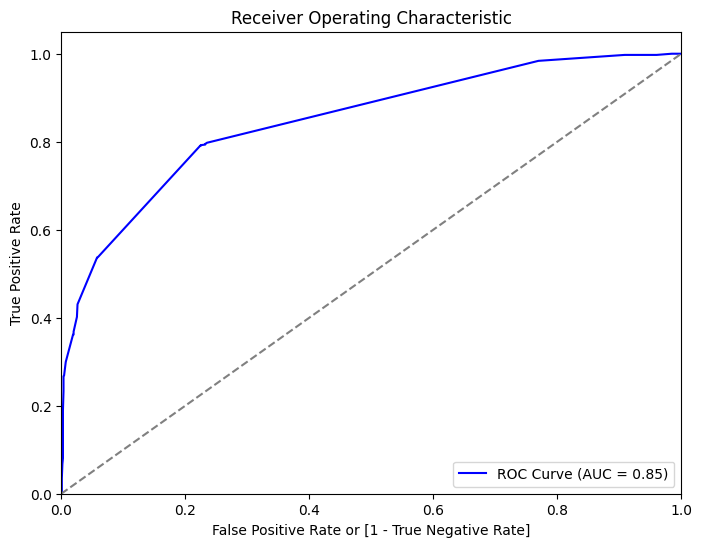

In [110]:
# Plot ROC AUC for Test Data
print("Testing Performance:")
udf_plot_roc_auc(y_test_pred_df['Converted'], y_test_pred_df['Conversion_Prob'])

**OBSERVATIONS**:

- We see an ROC-AUC score of 0.85 on the test set which is very good.

# 8. Lead Score Generation

## 8.1 Combining Train & Test Set

In [111]:
y_train_pred_df = y_train_pred_df[['Lead Number', 'Conversion_Prob']]
y_test_pred_df = y_test_pred_df[['Lead Number', 'Conversion_Prob']]

In [112]:
y_lead_score = pd.concat([y_train_pred_df, y_test_pred_df], axis=0)
y_lead_score.head()

Lead Number  Conversion_Prob
0       600123            0.481
1       614204            0.069
2       617857            0.034
3       644758            0.914
4       607605            0.205

In [113]:
y_train_pred_df.shape, y_test_pred_df.shape, y_lead_score.shape

((7392, 2), (1848, 2), (9240, 2))

## 8.2 Assigning Lead Score

In [114]:
y_lead_score['Lead Score'] = y_lead_score['Conversion_Prob'].map(lambda x: round(x*100))
y_lead_score.head()

Lead Number  Conversion_Prob  Lead Score
0       600123            0.481          48
1       614204            0.069           7
2       617857            0.034           3
3       644758            0.914          91
4       607605            0.205          20

In [115]:
# Add Priority based on Lead Score conditions
def assign_priority(score):
    if score > 80:
        return 'Very High'
    elif score > 60:
        return 'High'
    elif score > 40:
        return 'Medium'
    else:
        return 'Low'

In [116]:
y_lead_score['Priority'] = y_lead_score['Lead Score'].apply(assign_priority)
y_lead_score.head()

Lead Number  Conversion_Prob  Lead Score   Priority
0       600123            0.481          48     Medium
1       614204            0.069           7        Low
2       617857            0.034           3        Low
3       644758            0.914          91  Very High
4       607605            0.205          20        Low

#### **9. Key Findings and Recommendations**

This section consolidates the most critical insights derived from the preceding analysis and proposes a set of data-driven, actionable recommendations to help X Education achieve its business objectives.

##### **9.1 Key Findings**

The final logistic regression model (`model_3`) provided clear, statistically significant insights into the factors that drive lead conversion.

1.  **A Robust and Predictive Model was Successfully Built:** The model's performance on the unseen test set establishes its reliability for business use. With an **Accuracy of 78.2%** and an **Area Under the Curve (AUC) of 0.85 (see Test Set ROC Curve below)**, the model demonstrates excellent ability to distinguish between leads that will convert and those that will not. Critically, by using an optimal probability threshold of 0.35, we achieved a high **Sensitivity of 79.2%**. This means the model is highly effective at its primary goal: identifying the vast majority of "Hot Leads."
    

2.  **Lead Origin and Profile are the Most Powerful Predictors:** The model's coefficients revealed that *how* and *who* a lead is when they enter the sales funnel is paramount. **The Feature Importance Plot below** visually ranks the impact of each variable.
    *   The strongest positive predictors are `Lead Source_Welingak Website` (coef: 3.23) and `Lead Profile_Lateral Student` (coef: 2.97). This finding is significant because it points to specific, high-value segments that are far more likely to convert than the average lead.
    *   Conversely, the `Lead Profile_Student of SomeSchool` (coef: -2.00) was the strongest negative predictor, indicating these leads are not a valuable target for the sales team's manual efforts.
    

3.  **Specific Demographics and Engagements Signal High Intent:**
    *   `What is your current occupation_Working Professional` (coef: 2.44) stands out as a key demographic, confirming that employed individuals seeking to upskill are a core customer base.
    *   Positive engagement signals like `Last Activity_Had a Phone Conversation` (coef: 1.72) and `Last Activity_SMS Sent` (coef: 1.28) are strong indicators that a lead is progressing toward conversion.
    *   Negative signals like `Last Activity_Olark Chat Conversation` (coef: -1.25) suggest that this channel may be attracting low-intent leads or is not effectively resolving customer queries.

4.  **Early EDA Insights Were Validated:** The exploratory analysis strongly suggested that `Total Time Spent on Website` was a key differentiator. **This is visually confirmed by the boxplot from our EDA (see below)**, which shows a clear and significant difference in time spent between converted and non-converted leads. While this feature was not ultimately selected by RFE in favor of more specific categorical predictors, it reinforces the principle that lead engagement is crucial.
    

##### **9.2 Recommendations**

The findings above translate directly into the following strategic recommendations:

1.  **Operationalize the Lead Scoring Model:**
    *   **Action:** Immediately deploy the model to assign a priority score (0-100) to every new lead.
    *   **Justification:** This directly addresses the business problem by enabling the sales team to focus their limited time on leads with the highest conversion probability. It's the primary tool for improving sales efficiency and targeting the 80% conversion goal for hot leads.

2.  **Re-allocate Marketing and Partnership Resources:**
    *   **Action:** Increase marketing spend and deepen partnership efforts with `Welingak Website`. Investigate the acquisition channels for `Lateral Student` profiles to replicate their success.
    *   **Justification:** The model proves that leads from these sources are not just leads; they are high-potential sales opportunities. Investing here will yield a significantly higher ROI than general marketing campaigns.

3.  **Tailor Communication Strategies Based on Lead Profile:**
    *   **Action:** Develop distinct communication cadences. High-scoring leads (especially those from top sources) should receive prompt, personal follow-up. Low-scoring leads (like "Student of SomeSchool") should be placed in low-touch, automated email streams.
    *   **Justification:** This aligns sales effort with lead potential. It stops the team from wasting valuable call time on leads who are statistically very unlikely to convert, like those whose last activity was an `Olark Chat`.

4.  **Enhance Data Governance for Future Success:**
    *   **Action:** Make the `Specialization` and `What is your current occupation` fields mandatory on all lead capture forms.
    *   **Justification:** Our initial data cleaning revealed significant missing values. Enforcing data collection for these key fields will provide richer data for future model iterations, allowing for even more granular and accurate predictions.

In [117]:
# End